In [27]:
import sys, os
sys.path.append('../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
from systematics_module import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

#HF = lambda Nr,Nbin: (Nr-Nbin-2) *1./(Nr-1)
#HFactor = HF(100, 10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## systematic test 

In [2]:
import numpy as np

In [3]:
from run_systematics import sys_iteration, fitting_SP, sys_ngal, weightmultiply, fitting_allSP, calling_sysMap, maskingCatalogSP

In [106]:
rootdir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/'
inputdir = rootdir +'/stellar/'
figoutdir = inputdir+'/figure/'
sysoutdir = inputdir+'/sys/'
wdir = sysoutdir+'/weights/'

basedir = inputdir+'/act/'
os.system('mkdir '+inputdir+'/act/')

os.system('mkdir '+inputdir)
os.system('mkdir '+figoutdir)
os.system('mkdir '+sysoutdir)
os.system('mkdir '+wdir)
#os.system('cp ../data_txt/systematics/4th/systematic*_no_weight.txt '+inputdir+'/.')

256

In [16]:
# calling map 
GoldMask = callingEliGoldMask()
#GoldMask_st82 = Cuts.SpatialCuts(GoldMask, ra=320, ra2=360, dec=-2, dec2=2)
GoldMask_st82 = GoldMask[ GoldMask['DEC'] > -3.0 ]
GoldMask_spt = GoldMask[ GoldMask['DEC'] < -3.0 ]
#GoldMask_spt = cutcat20(GoldMask_spt)
#GoldMask_spt = Cuts.SpatialCuts(GoldMask_spt, ra=0, ra2 = 100, dec=-52, dec2 = -48)

pixarea = hp.nside2pixarea( 4096, degrees = True)
sptnpix = GoldMask_spt['PIXEL'].size #hp.get_map_size( GoldMask_spt['PIXEL'] )
st82npix =  GoldMask_st82['PIXEL'].size # hp.get_map_size( GoldMask_st82 )
SPTMaparea = pixarea * sptnpix
ST82Maparea = pixarea * st82npix

In [17]:
sysMap_fwhm = calling_sysMap( properties=['FWHM'], kind='SPT', nside=4096 )
fwhm_r_hpind = sysMap['sys_FWHM_r_SPT']['PIXEL'][(sysMap['sys_FWHM_r_SPT']['SIGNAL'] < 4.5)]
HpIdxInsys_mask4096 = np.in1d(GoldMask_spt['PIXEL'], fwhm_r_hpind)
SPTMaparea_sysmasked = GoldMask_spt[HpIdxInsys_mask4096].size * hp.nside2pixarea(4096, degrees=True)
print 'SPT area:', SPTMaparea
print 'after fwhm_r > 4.5 masked:', SPTMaparea_sysmasked


PATH =  /n/des/lee.5922/data/systematic_maps/seeing_i_spt/
Y1A1NEW_COADD_SPT_band_g_nside4096_oversamp4_FWHM_MEAN_coaddweights3_mean.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT

PATH =  /n/des/lee.5922/data/systematic_maps/seeing_i_spt/
Y1A1NEW_COADD_SPT_band_r_nside4096_oversamp4_FWHM_MEAN_coaddweights3_mean.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT

PATH =  /n/des/lee.5922/data/systematic_maps/seeing_i_spt/
Y1A1NEW_COADD_SPT_band_i_nside4096_oversamp4_FWHM_MEAN_coaddweights3_mean.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT

PATH =  /n/des/lee.5922/data/systematic_maps/seeing_i_spt/
Y1A1NEW_COADD_SPT_band_z_nside4096_oversamp4_FWHM_MEAN_coaddweights3_mean.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT


NameError: name 'sysMap' is not defined

In [ ]:
print 'SPT area:', SPTMaparea
print 'after fwhm_r > 4.5 masked:', SPTMaparea_sysmasked

In [ ]:
# import DMASS

#dmass = fitsio.read(rootdir+'spt.fits')
#dmass = io.SearchAndCallFits(path = rootdir, keyword='gold_spt_prob')
dmass = io.SearchAndCallFits(path = rootdir, keyword='dmass_spt_sys_v3.fits')
dmass = dmass[dmass['CMASS_PROB'] > 0.01]
print 'dmass sample size :', np.sum(dmass['CMASS_PROB'])


#dmass = cutcat20(dmass)
#dmass_st82 = fitsio.read(rootdir+'dmass_st82_0004.fits')
dmass_st82 = io.SearchAndCallFits(path = rootdir, keyword='gold_st82_prob')
dmass_st82 = dmass_st82[dmass_st82['EachProb_CMASS'] > 0.01]
#dmass_st82 = dmass_st82[dmass_st82['EachProb_CMASS'] > 0.01]

cmass = fitsio.read(rootdir+'train_sample_des.fits')


print 'dmass st82 sample size :', np.sum(dmass_st82['EachProb_CMASS'])
print 'cmass sample size :', cmass.size


dmass = appendColumn(cat = dmass, name='WEIGHT', value=dmass['CMASS_PROB'])
dmass_st82 = appendColumn(cat = dmass_st82, name='WEIGHT', value=dmass_st82['EachProb_CMASS'])
print np.sum(dmass['CMASS_PROB']), np.sum(dmass_st82['EachProb_CMASS'])

In [12]:
#rand_bg = uniform_random_on_sphere(dmass_spt2, size = 100 * dmass_spt2.size)
#rand_bg = Cuts.keepGoodRegion(rand_bg)
#rand_bg_train = uniform_random_on_sphere(clean_cmass_data_des, size = 100 * clean_cmass_data_des.size)
#rand_bg_train = Cuts.keepGoodRegion(rand_bg_train)

rand = uniform_random_on_sphere(dmass, size = dmass.size)
rand = Cuts.keepGoodRegion(rand)
#rand = Cuts.keepY1GoldRegion(rand)
rand = rand[ rand['DEC'] < -3.0 ]
#rand = cutcat20(rand)

rand2 = io.SearchAndCallFits(path = rootdir, keyword='random_x50_dmass_spt.fits')
randind = np.random.choice(rand2.size, size = rand2.size/4 )
rand2 = rand2[randind]
#uniform_random_on_sphere(dmass, size = 10 * dmass.size)
#rand2 = Cuts.keepGoodRegion(rand2)
#rand = Cuts.keepY1GoldRegion(rand)
#rand2 = rand2[ rand2['DEC'] < -3.0 ]
#rand2 = cutcat20(rand2)


--------------------------------
 calling catalog
--------------------------------
random_x50_dmass_spt.fits


In [82]:
#dmass_masked = maskingCatalogSP(catalog=dmass, sysMap=sysMap)
#rand_masked = maskingCatalogSP(catalog=rand, sysMap=sysMap)

rand2_masked = io.SearchAndCallFits(path = rootdir, keyword='random_x50_dmass_spt_masked.fits')
sample_ind = np.random.choice( rand2_masked.size, size = rand.size )
sampling_mask = np.zeros(rand2_masked.size, dtype=bool)
sampling_mask[sample_ind] = 1

#randind = np.random.choice(rand2_masked.size, size = rand2.size/4 )
rand_masked = rand2_masked[sampling_mask]
rand2_masked = rand2_masked[~sampling_mask]

randind = np.random.choice(rand2_masked.size, size = rand2_masked.size/4 )
rand2_masked = rand2_masked[randind]


--------------------------------
 calling catalog
--------------------------------
random_x50_dmass_spt_masked.fits


In [9]:
rand_cmass = uniform_random_on_sphere(cmass, size = 10*cmass.size)
rand_cmass = Cuts.keepGoodRegion(rand_cmass)
rand_cmass = rand_cmass[ rand_cmass['DEC'] > -3.0 ]

rand2_cmass = uniform_random_on_sphere(cmass, size = 10*cmass.size)
rand2_cmass = Cuts.keepGoodRegion(rand2_cmass)
rand2_cmass = rand2_cmass[ rand2_cmass['DEC'] > -3.0 ]

print rand.size, dmass.size
print rand_cmass.size, cmass.size
#rand_train = uniform_random_on_sphere(clean_cmass_data_des, size = 10 * clean_cmass_data_des.size)
#rand_train = Cuts.keepGoodRegion(rand_train)

13626 685616
10295 12639


# Systematics 

In [20]:
kind = 'SPT'
FullArea = SPTMaparea
#properties = ['DEPTH','EXPTIME']
properties = ['DEPTH', 'EXPTIME', 'AIRMASS', 'SKYBRITE', 'FWHM', 'NSTARS_allband', 'GE']
#properties = ['DEPTH', 'EXPTIME', 'AIRMASS', 'SKYBRITE', 'FWHM']
#properties = ['GE', 'NSTARS_allband']
#properties = ['FWHM']
suffix='no_weight'
# calculating galaxy density and weights iterately

In [21]:
sysMap = calling_sysMap( properties=properties, kind='SPT', nside=4096 )


PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
Y1A1NEW_COADD_SPT_band_g_nside4096_oversamp4_maglimit3__.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT

PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
Y1A1NEW_COADD_SPT_band_r_nside4096_oversamp4_maglimit3__.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT

PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
Y1A1NEW_COADD_SPT_band_i_nside4096_oversamp4_maglimit3__.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT

PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
Y1A1NEW_COADD_SPT_band_z_nside4096_oversamp4_maglimit3__.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT

PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
Y1A1NEW_COADD_SPT_band_g_nside4096_oversamp4_EXPTIME__total.fits.gz

In [ ]:
#sysMap_nstar = calling_sysMap( properties=['NSTARS_allband'], kind='SPT', nside=4096 )
#sysMap_ge = calling_sysMap( properties=['GE'], kind='SPT', nside=4096 )

In [ ]:
sysMap_st82 = calling_sysMap( properties=['GE'], kind='STRIPE82', nside=4096 )

In [ ]:
#dmass_masked = maskingCatalogSP(catalog=dmass, sysMap=sysMap)
#rand_masked = maskingCatalogSP(catalog=rand, sysMap=sysMap)
#rand2_masked = maskingCatalogSP(catalog=rand2, sysMap=sysMap)

### DMASS st82 mocks galactic extinction test 

In [19]:
from systematics_module.contCorrection import doVisualization_ngal

../systematics.py:516: UserWarning: Warning: converting a masked element to nan.
  Ngal = np.array(Ngal)
/n/home00/lee.5922/.local/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_GE_g_STRIPE82_gold_st82.txt
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/systematic_GE_STRIPE82_gold_st82.png


0

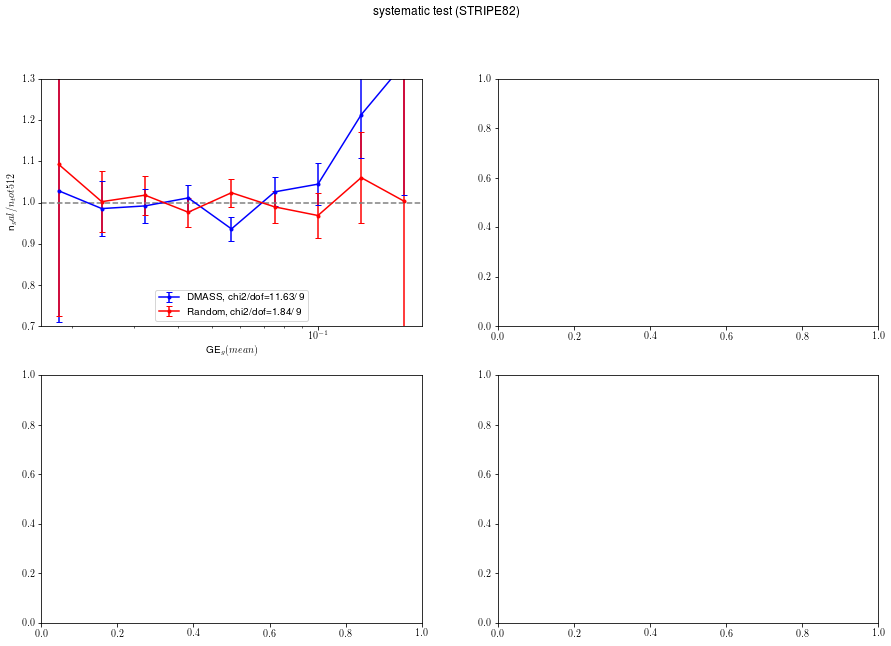

In [52]:

sys_ngal(cat1 = dmass_st82, cat2=rand_cmass, rand1 = rand2_cmass, rand2 = rand2_cmass, sysmap = sysMap_st82, 
     FullArea = SPTMaparea, properties = ['GE'], kind='STRIPE82', nbins =15, 
     nside = 4096,
     suffix='gold_st82', outdir=sysoutdir, reweight = dmass_st82['EachProb_CMASS'])

doVisualization_ngal(property = 'GE', nside = 4096, kind = 'STRIPE82', suffix='gold_st82', \
                     inputdir=sysoutdir, outdir=figoutdir)

saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//figure/systematic_GE_SPT_gold_spt.png


0

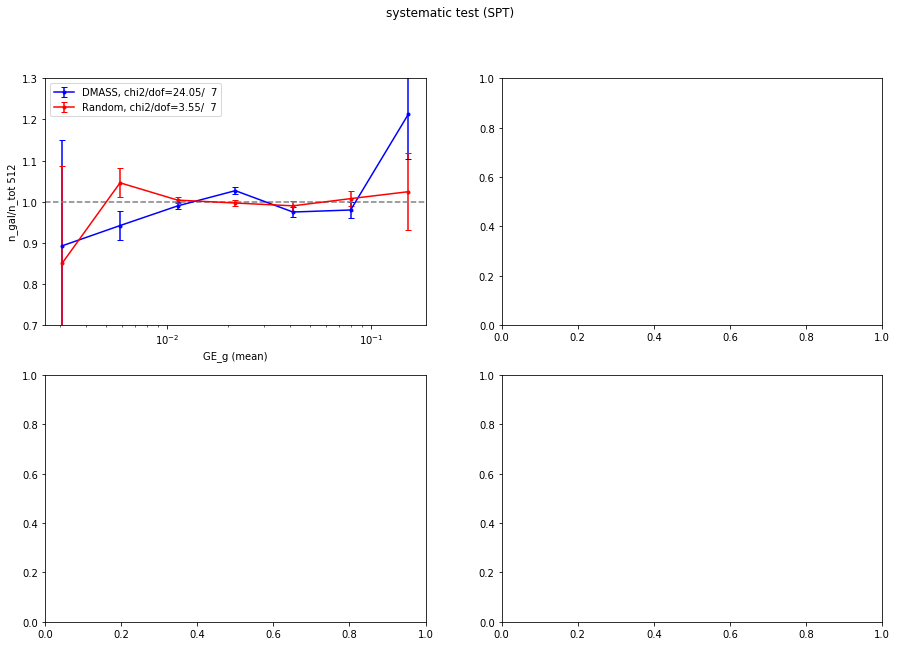

In [12]:
# 15
#sys_ngal(cat1 = dmass, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap_ge, 
#         FullArea = SPTMaparea, properties = ['GE'], kind='SPT', nbins =8, 
#         reweight= dmass['EachProb_CMASS'], nside = 4096,
#         suffix='gold_spt', outdir=sysoutdir)

from systematics_module.contCorrection import doVisualization_ngal
doVisualization_ngal(property = 'GE', nside = 4096, kind = 'SPT', suffix='gold_spt', \
                         inputdir=sysoutdir, outdir=figoutdir)

### no weight 

In [22]:
# 15
sys_ngal(cat1 = dmass, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap, 
         FullArea = SPTMaparea, properties = properties, kind='SPT', nbins =15, 
         reweight= dmass['CMASS_PROB'], nside = 4096,
         suffix='no_weight', outdir=sysoutdir)


sys_ngal : 
the number of bins= 15


../systematics.py:575: UserWarning: Warning: converting a masked element to nan.
  Ngal = np.array(Ngal)


saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_z_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_EXPTIME_g_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_EXPTIME_r_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_EXPTIME_i_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systema

saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//figure/systematic_DEPTH_SPT_no_weight.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//figure/systematic_EXPTIME_SPT_no_weight.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//figure/systematic_AIRMASS_SPT_no_weight.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//figure/systematic_SKYBRITE_SPT_no_weight.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//figure/systematic_FWHM_SPT_no_weight.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//figure/systematic_NSTARS_allband_SPT_no_weight.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//figure/systematic_GE_SPT_no_weight.png


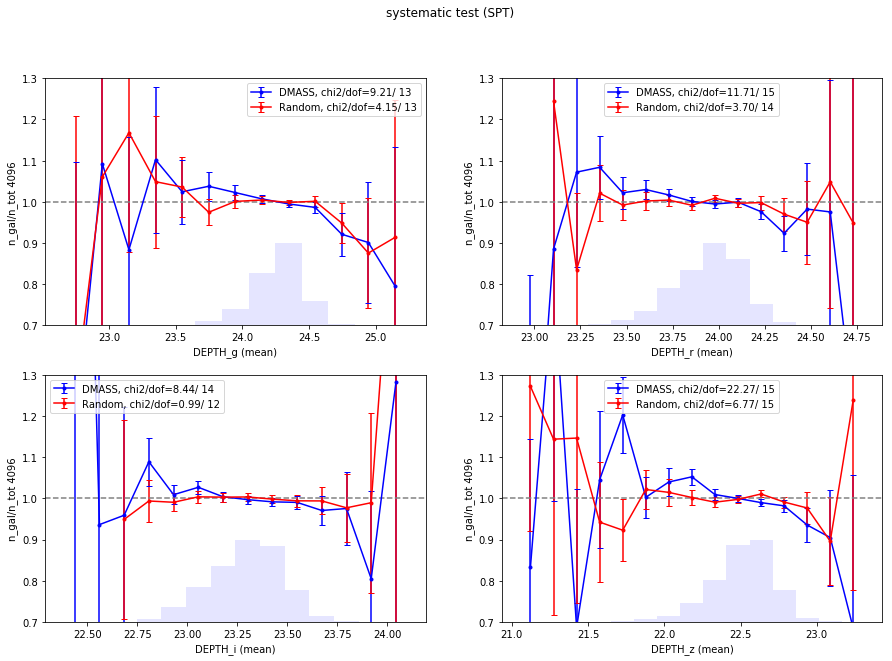

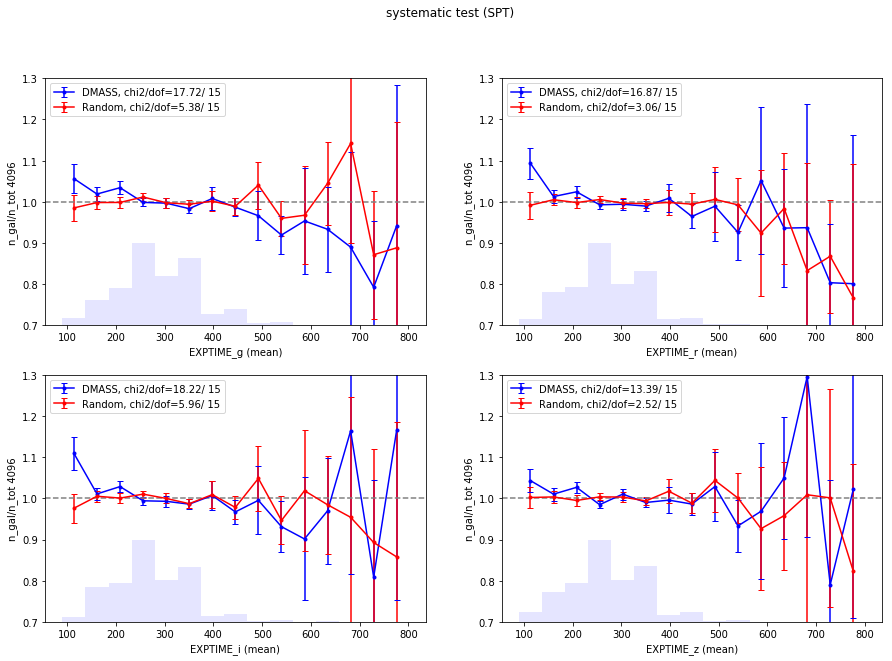

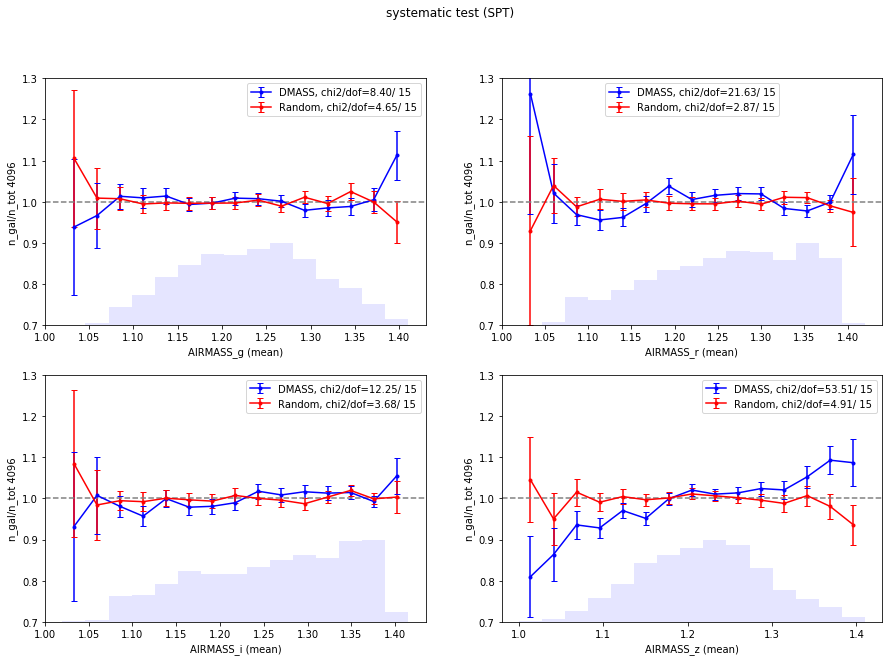

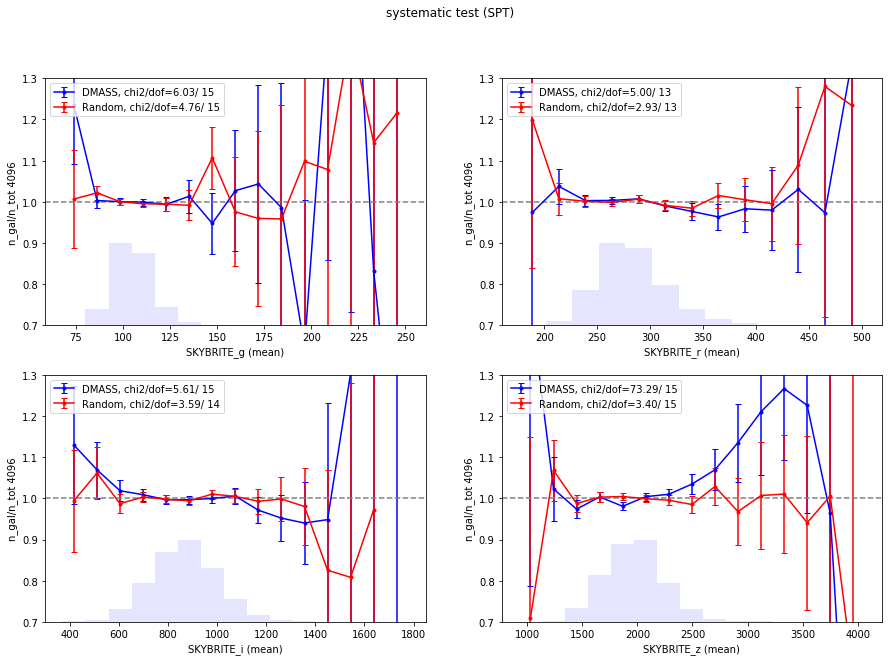

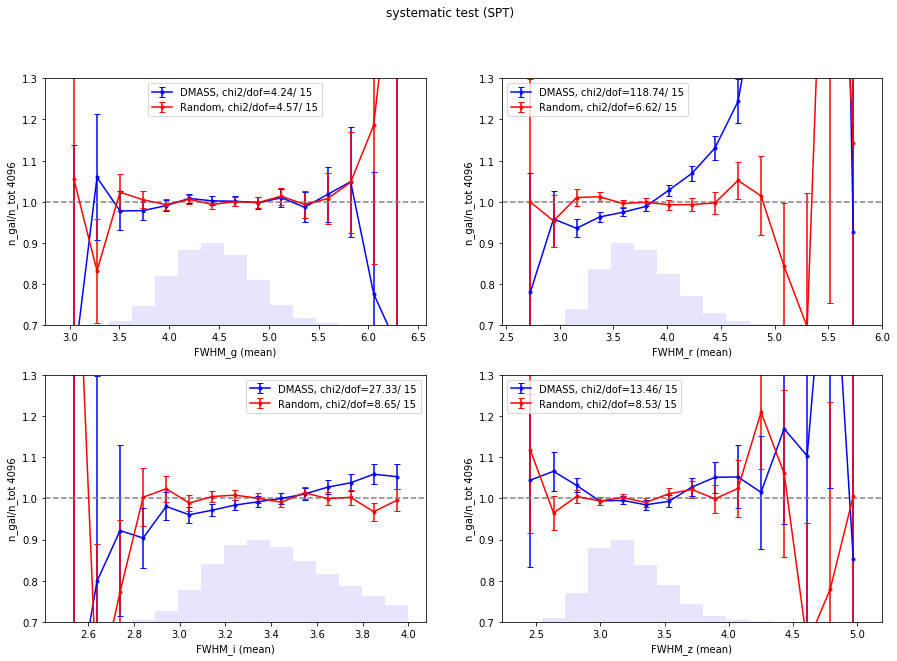

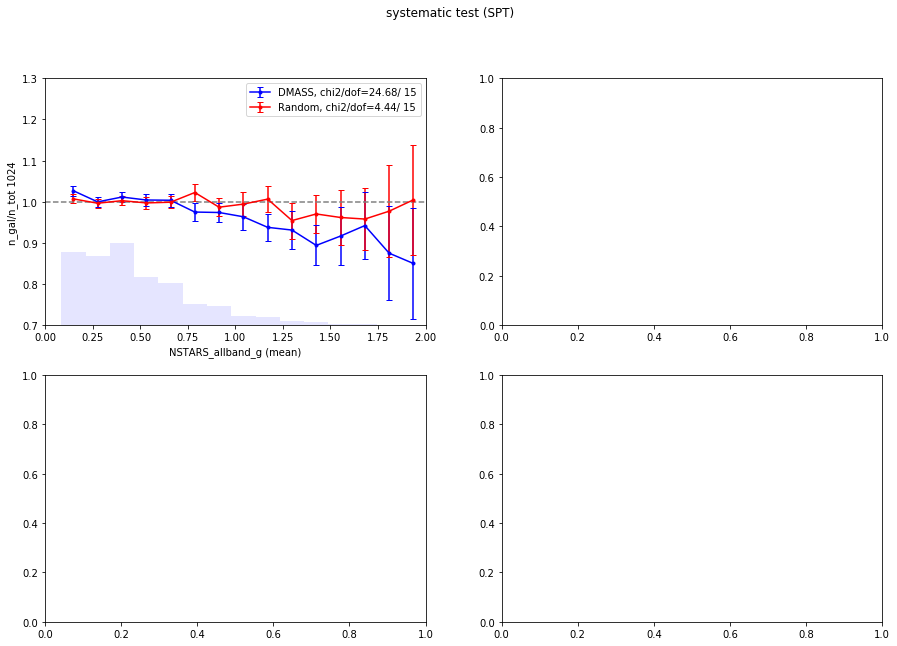

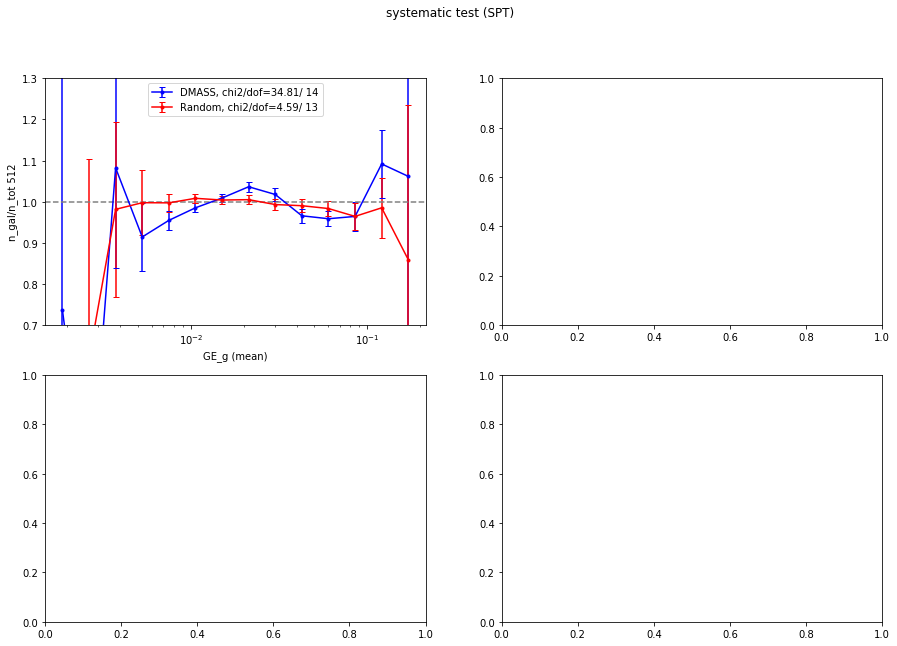

In [48]:
from systematics_module.contCorrection import doVisualization_ngal
for p in properties : 
    doVisualization_ngal(property = p, nside = 4096, kind = kind, suffix='no_weight', \
                         inputdir=sysoutdir, outdir=figoutdir )

all linear function
chi2_null =  9.210762190147962
chi2_mod. =  2.923145568627794
Delta chi2 (sample) = 6.2876166215201685
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_no_weight.txt.model

chi2_null =  11.710452275195207
chi2_mod. =  5.098364412556115
Delta chi2 (sample) = 6.612087862639092
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_no_weight.txt.model

chi2_null =  8.436185740312466
chi2_mod. =  2.9581370899620887
Delta chi2 (sample) = 5.478048650350377
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_no_weight.txt.model

chi2_null =  22.268165919768773
chi2_mod. =  9.07943829813551
Delta chi2 (sample) = 13.188727621633262
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_z_SPT_no_weight.txt.model

saving fig to  ../output/sfd

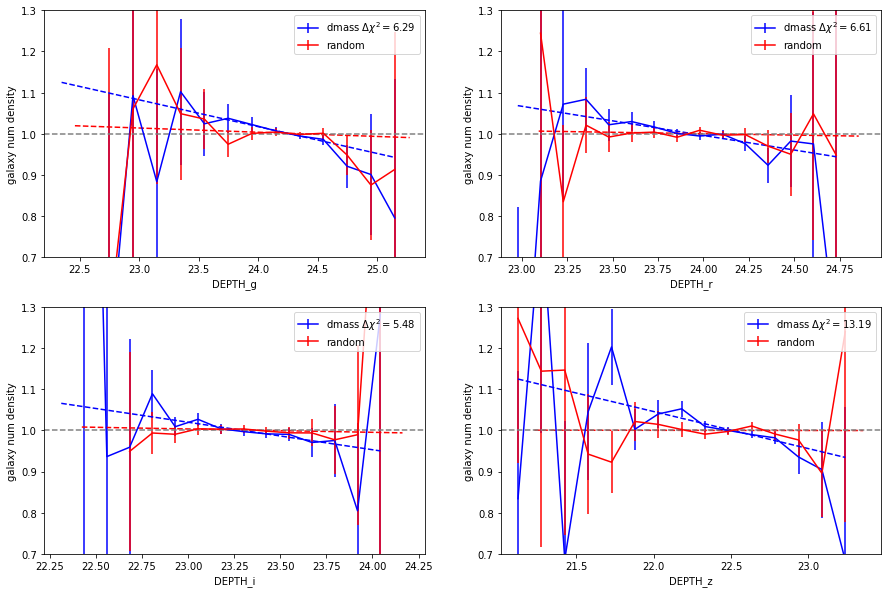

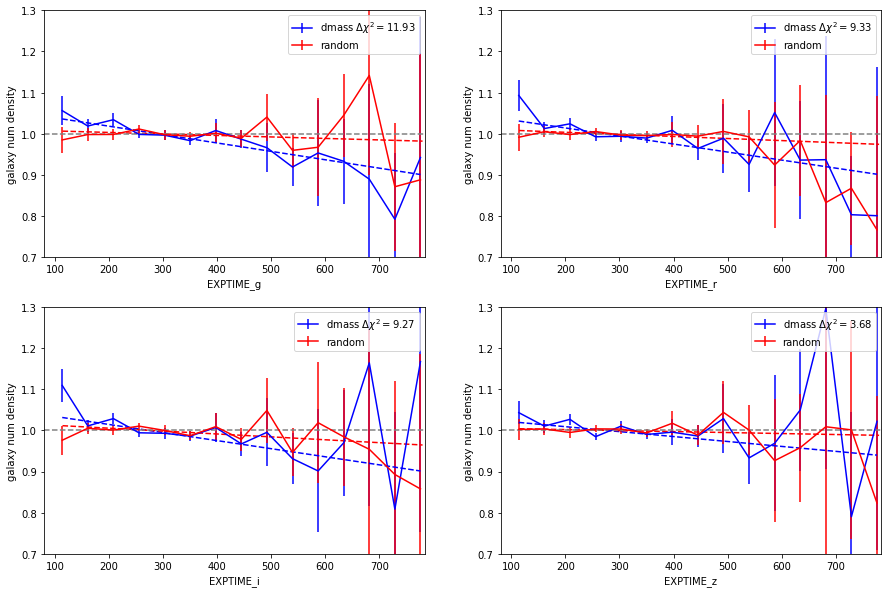

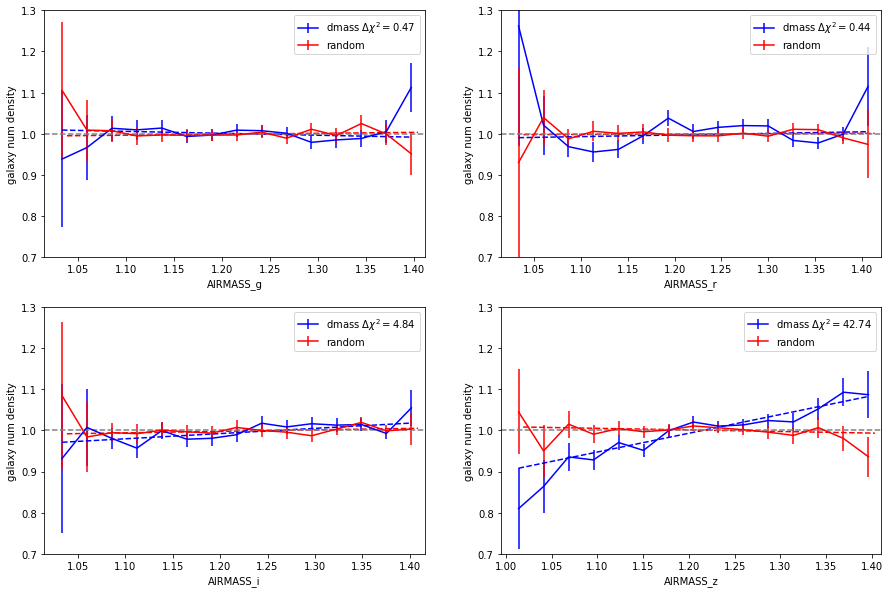

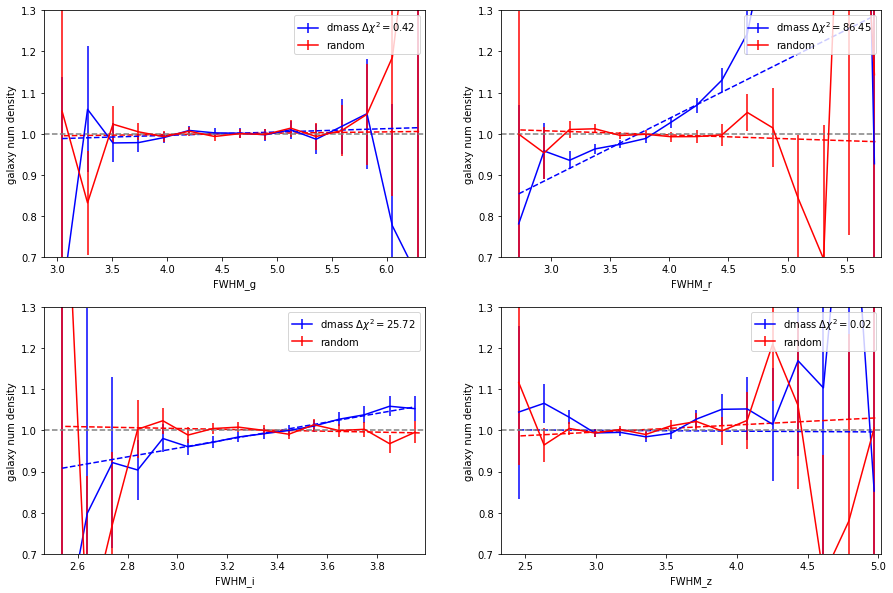

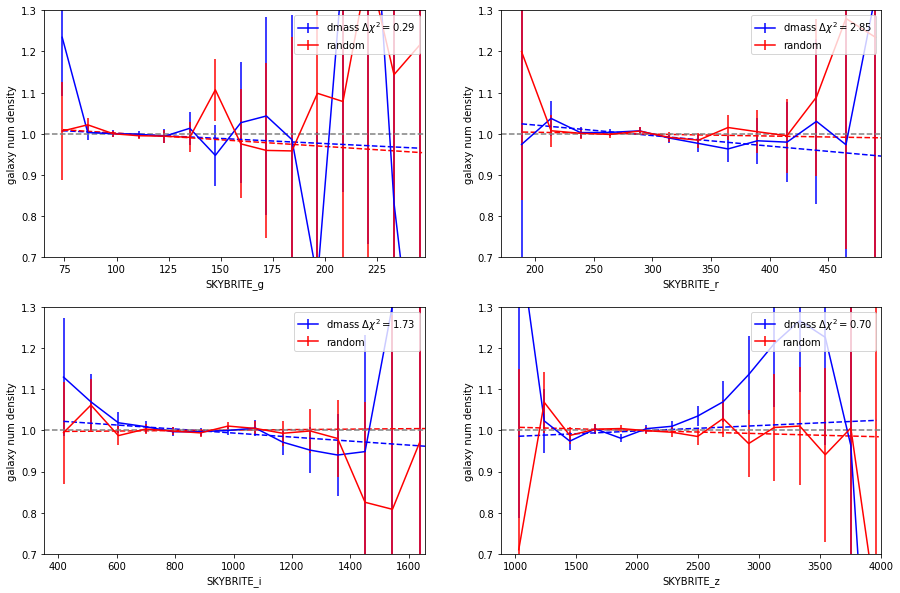

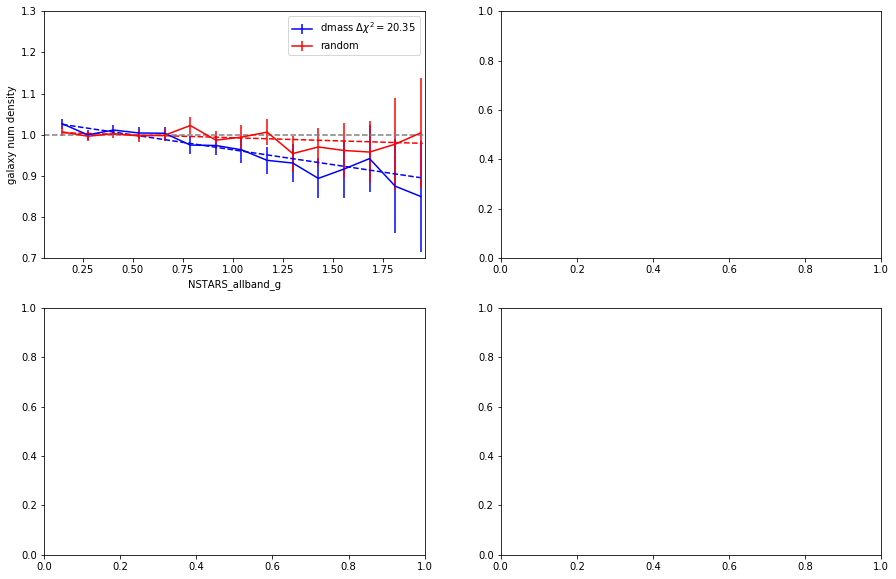

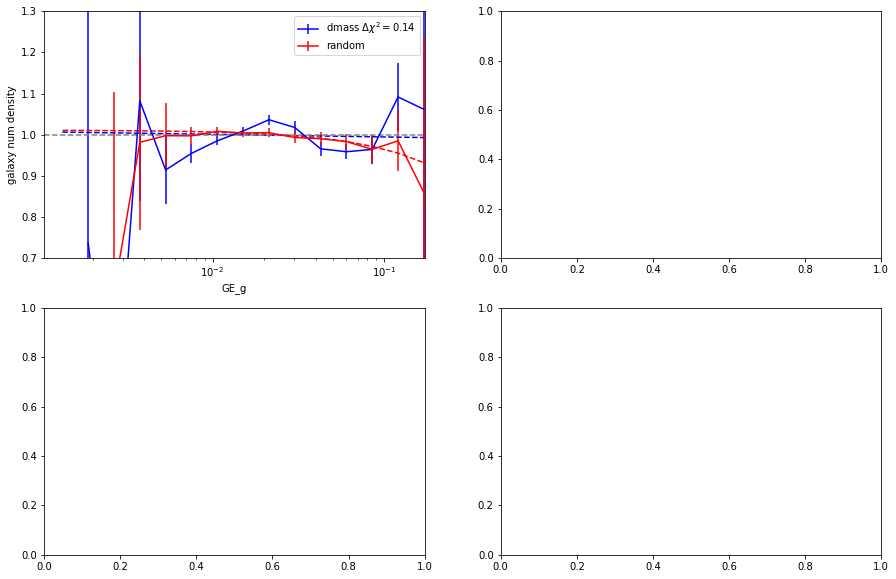

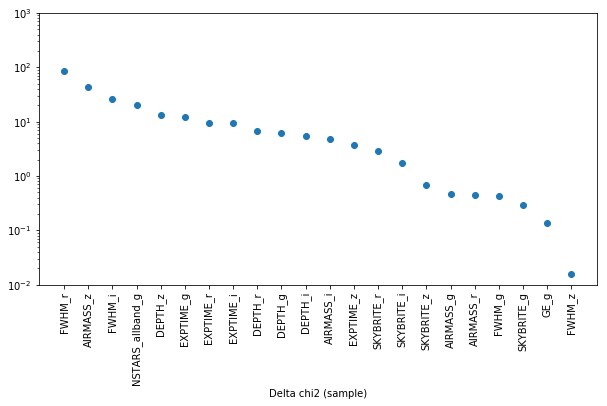

In [49]:
fitting_allSP( 'no_weight', properties = properties, inputdir = sysoutdir )
nextwname, nextw = plotting_significance( property = properties, filter=['g', 'r', 'i', 'z'], kind = 'SPT', 
                      suffix='no_weight', 
                path = sysoutdir, deltachi2=True)

### veto

In [83]:
# 15
sys_ngal(cat1 = dmass, cat2=rand_masked, rand1 = rand2_masked, rand2 = rand2_masked, sysmap = sysMap, 
         FullArea = SPTMaparea, properties = properties, kind='SPT', nbins =15, 
         reweight= dmass['CMASS_PROB']*dmass['VETO'], nside = 4096,
         suffix='vetoed', outdir=sysoutdir)


sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_z_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_EXPTIME_g_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_EXPTIME_r_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_EXPTIME_i_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stell

saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//figure/systematic_DEPTH_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//figure/systematic_EXPTIME_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//figure/systematic_AIRMASS_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//figure/systematic_SKYBRITE_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//figure/systematic_FWHM_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//figure/systematic_NSTARS_allband_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//figure/systematic_GE_SPT_vetoed.png


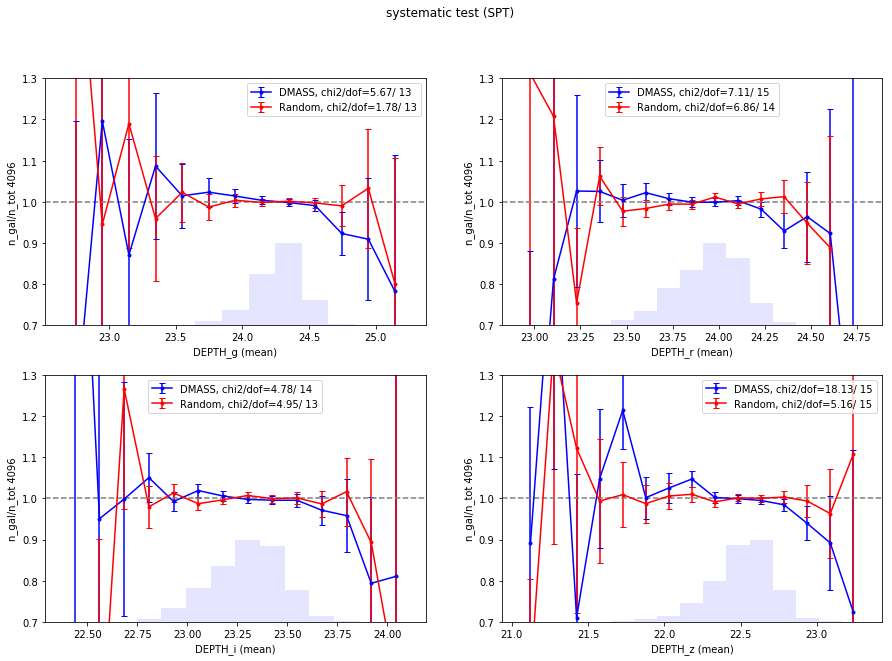

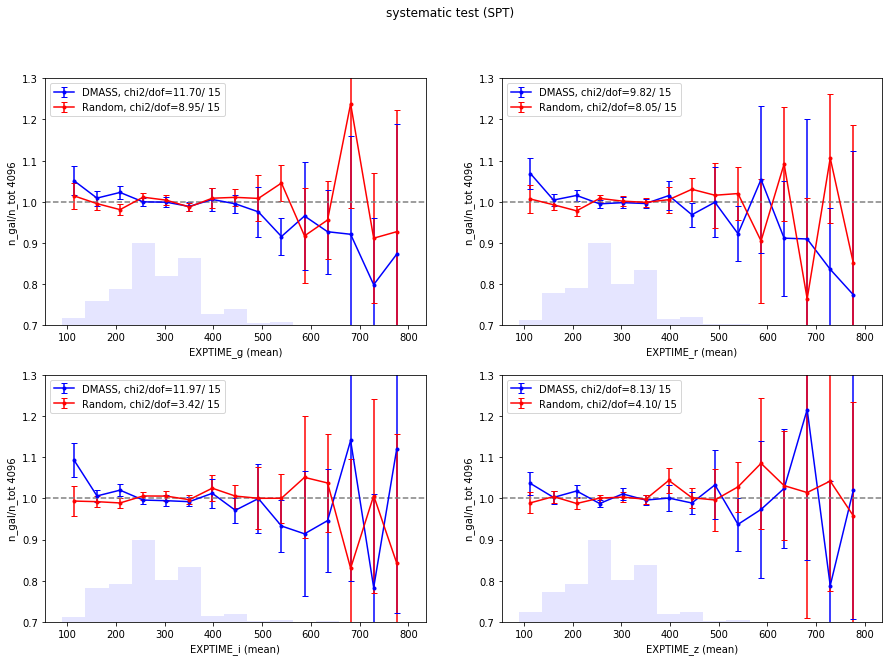

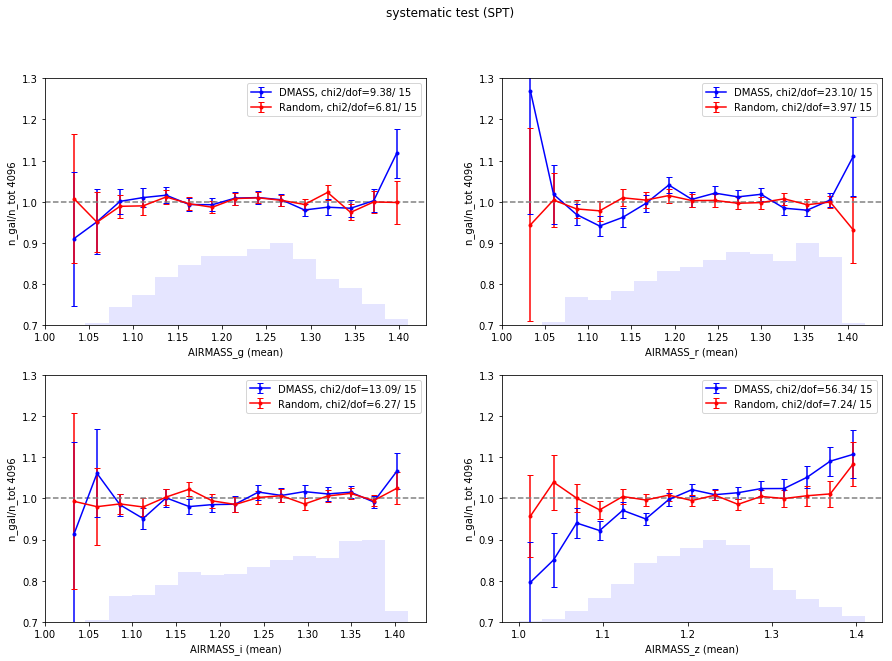

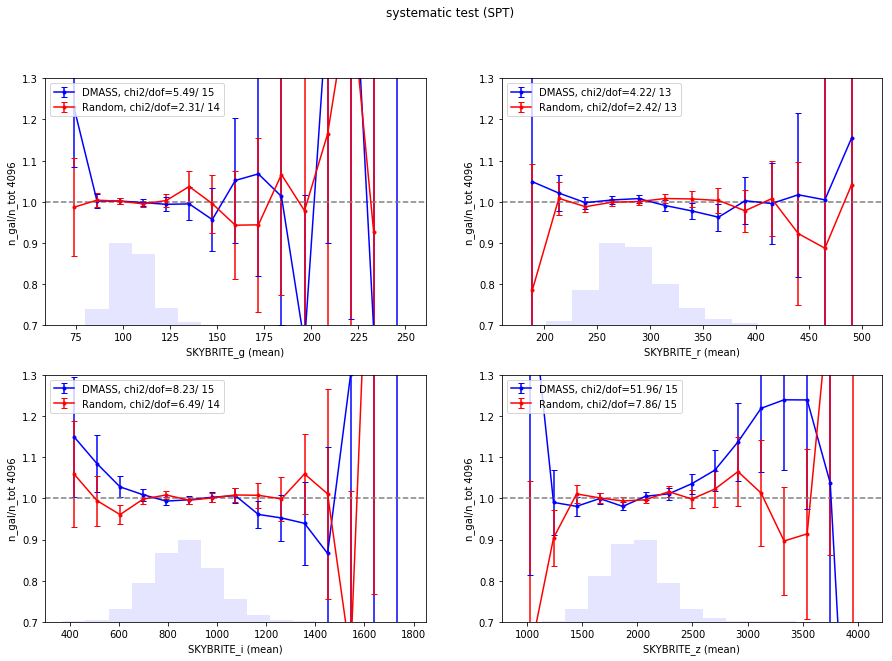

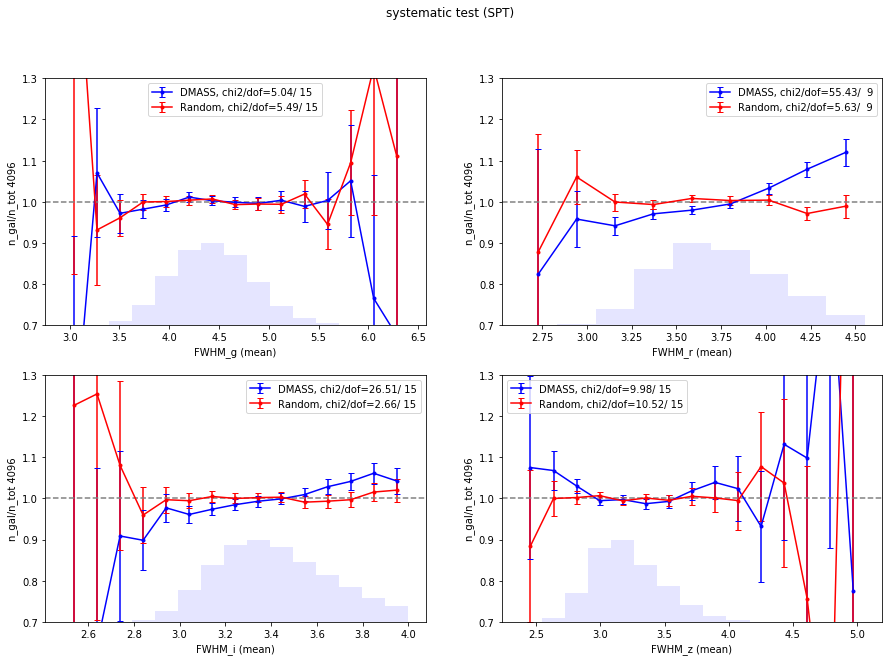

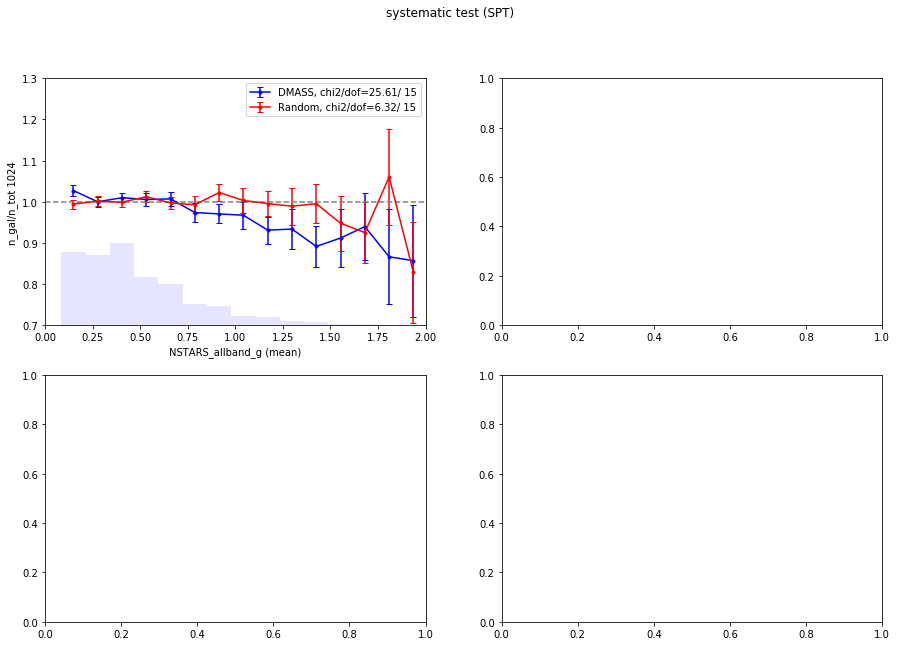

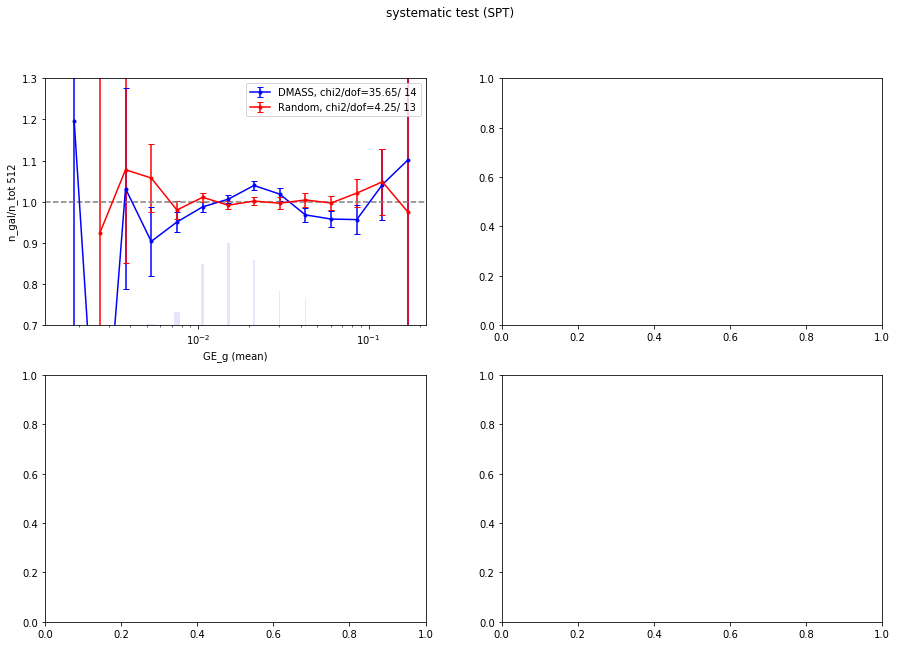

In [84]:
from systematics_module.contCorrection import doVisualization_ngal
for p in properties : 
    doVisualization_ngal(property = p, nside = 4096, kind = kind, suffix='vetoed', \
                         inputdir=sysoutdir, outdir=figoutdir )

all linear function
chi2_null =  5.670831251495008
chi2_mod. =  2.9262773020247757
Delta chi2 (sample) = 2.744553949470232
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_vetoed.txt.model

chi2_null =  7.110641140794456
chi2_mod. =  4.931572458635905
Delta chi2 (sample) = 2.179068682158551
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_vetoed.txt.model

chi2_null =  4.783181899709366
chi2_mod. =  2.6798250131034145
Delta chi2 (sample) = 2.103356886605951
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_vetoed.txt.model

chi2_null =  18.127032544305898
chi2_mod. =  9.516507747961345
Delta chi2 (sample) = 8.610524796344553
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_z_SPT_vetoed.txt.model

saving fig to  ../output/sfd_train_photo_

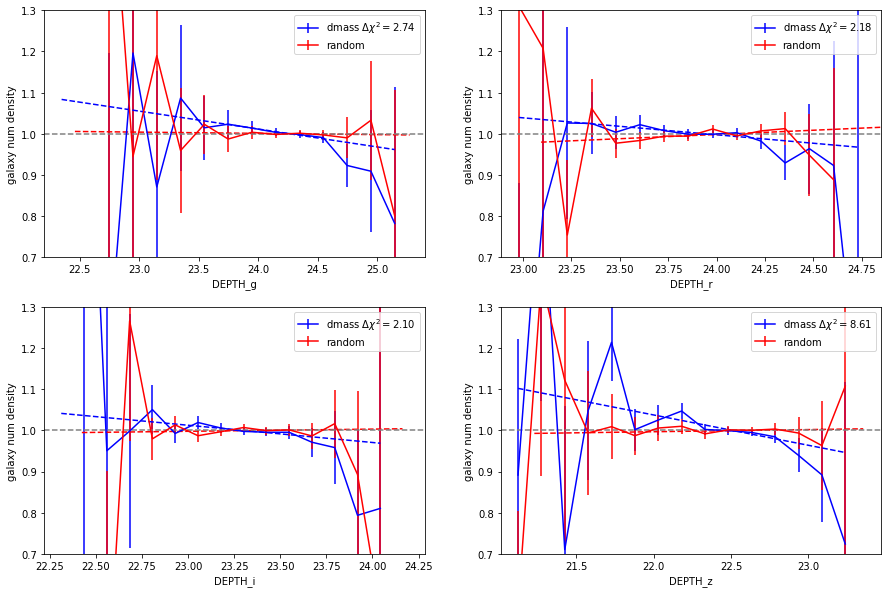

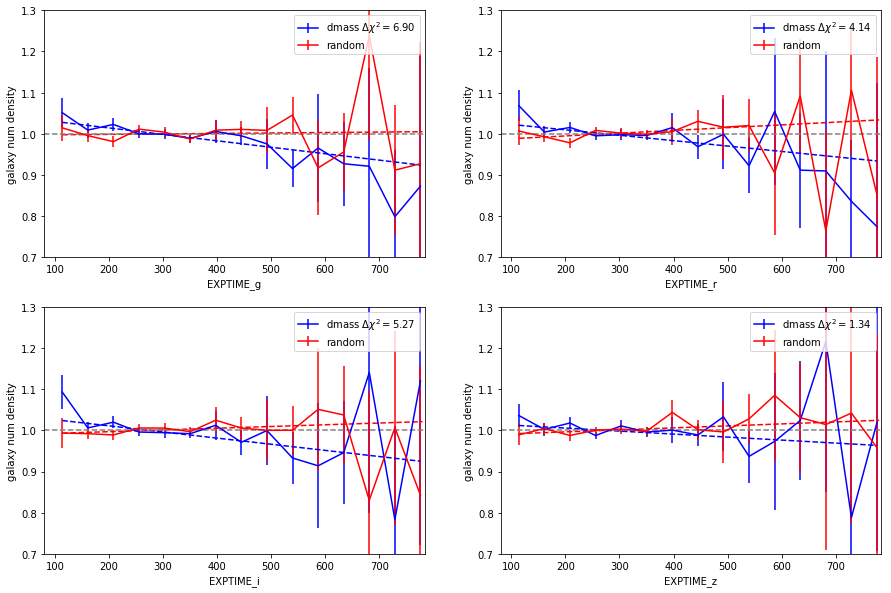

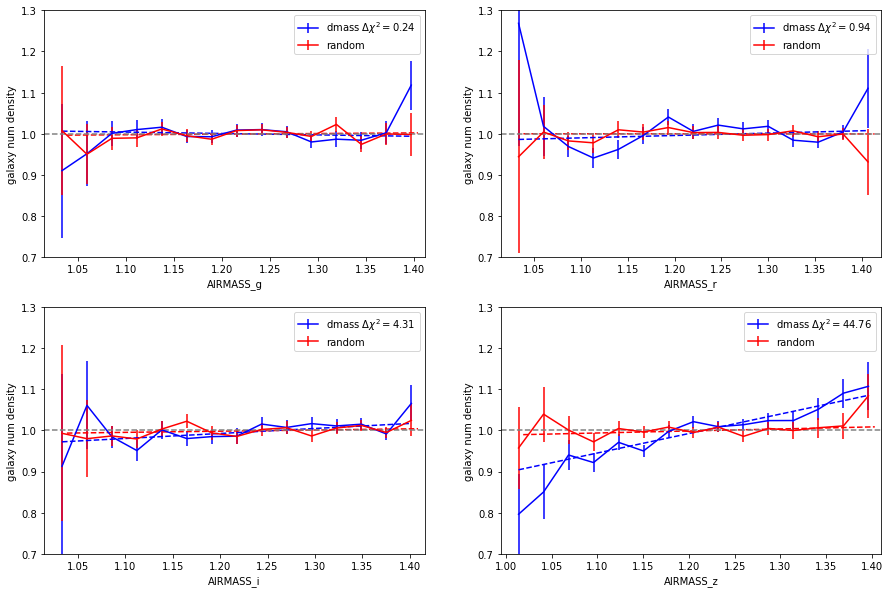

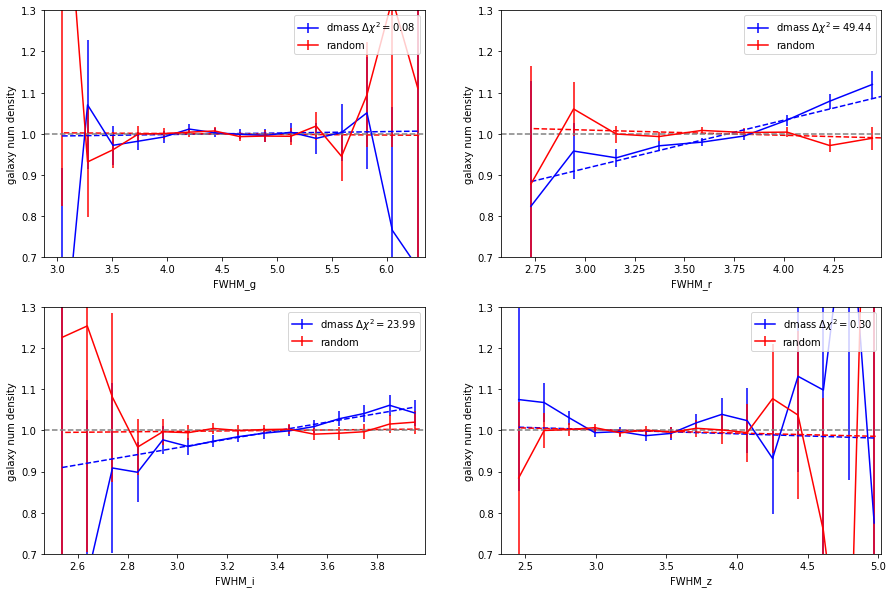

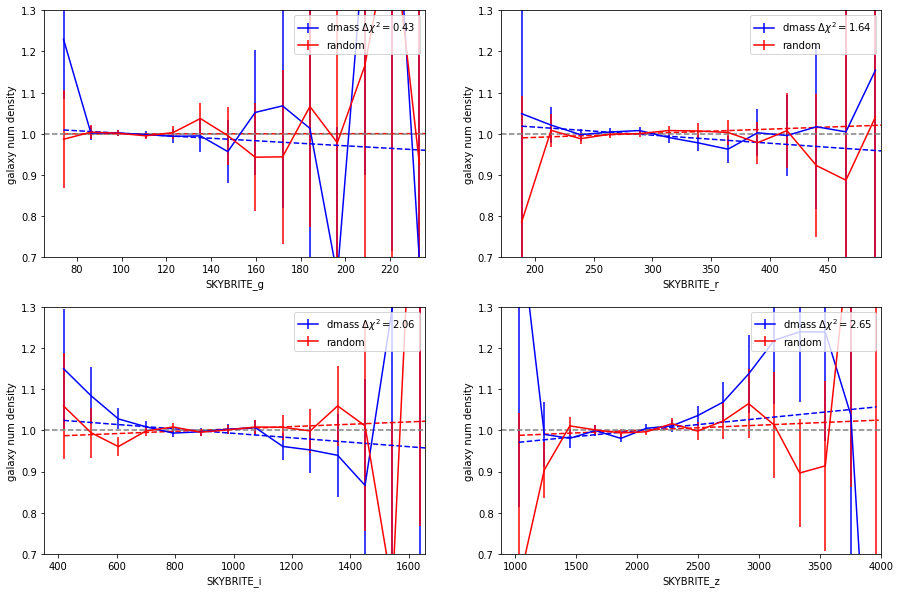

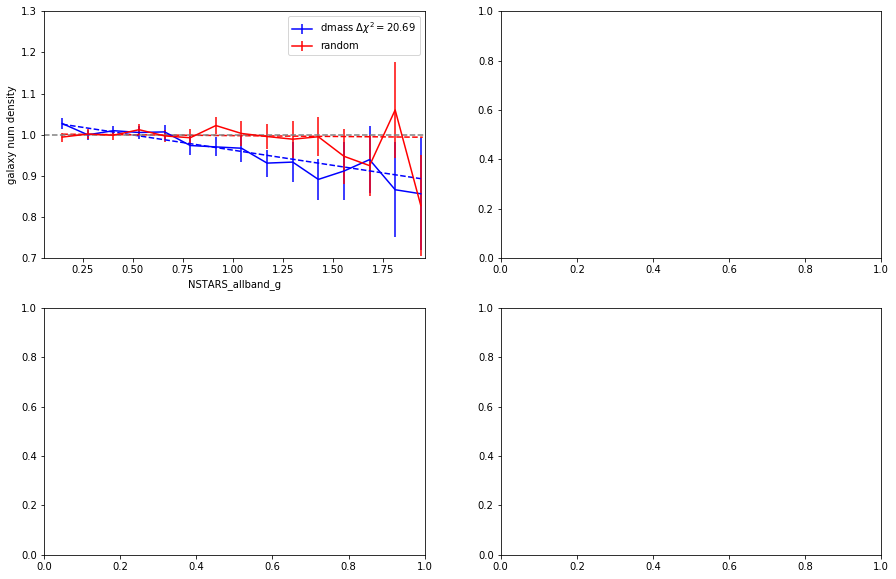

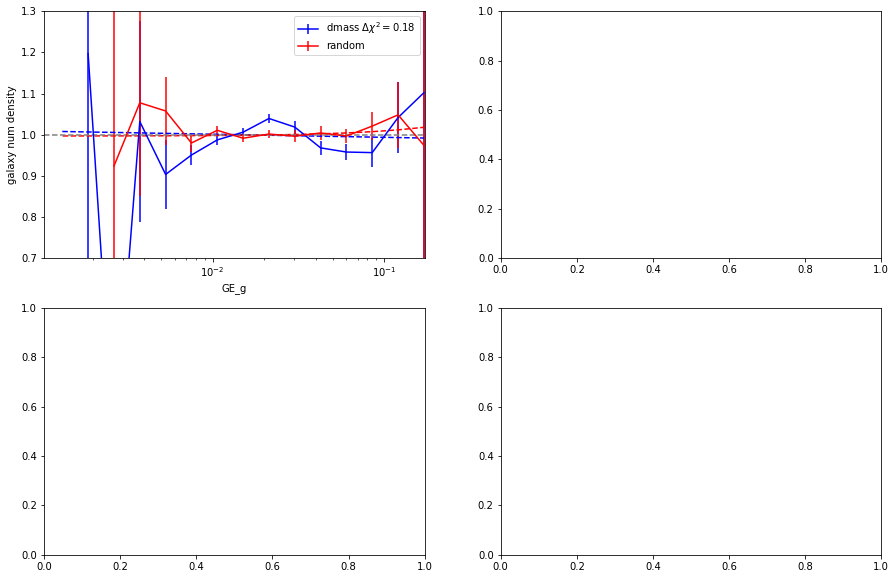

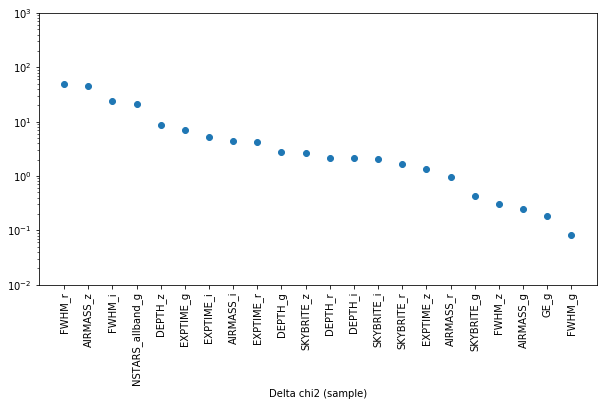

In [85]:
fitting_allSP( 'vetoed', properties = properties, inputdir = sysoutdir )
nextwname, nextw = plotting_significance( property = properties, filter=['g', 'r', 'i', 'z'], kind = 'SPT', 
                      suffix='vetoed', 
                path = sysoutdir, deltachi2=True)

# Correction ! 

### Galactic Extinction

In [91]:
weightDic = {}
weightDic['vetoed'] = dmass['CMASS_PROB'] * dmass['VETO']
all_weight = weightmultiply(weightDic)
suffix = 'vetoed'
nextweight = nextwname[0]
print 'nextweight', nextweight

['vetoed']
vetoed
nextweight FWHM_r


-------------------------
 iteration - 0
 nextweight FWHM_r
-------------------------
['vetoed']
vetoed
sys_iteration
----------------------------------
initialize function  FWHM_r
linear


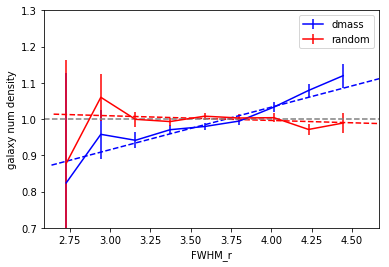

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  FWHM_r
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_fwhm_r_SPT.fits
suffix =  wg_fwhm_r

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_wg_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_z_SPT_wg_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_EXPTIME_g_SPT_wg_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic

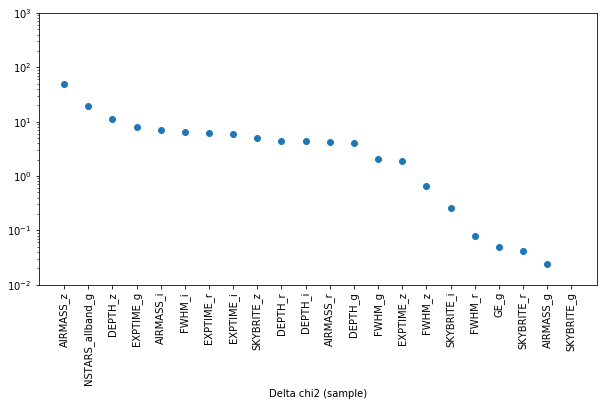

-------------------------
 iteration - 1
 nextweight AIRMASS_z
-------------------------
['vetoed', 'FWHM_r']
vetoed
FWHM_r
sys_iteration
----------------------------------
initialize function  AIRMASS_z
linear


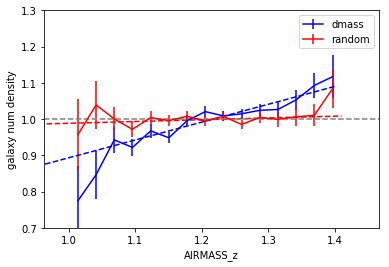

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  AIRMASS_z
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_airmass_z_SPT.fits
suffix =  wg_fwhm_r_airmass_z

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_EXPTIME_g_SPT_wg_fwhm_r_airmass_z.txt
saving data to  ../output/sfd_train

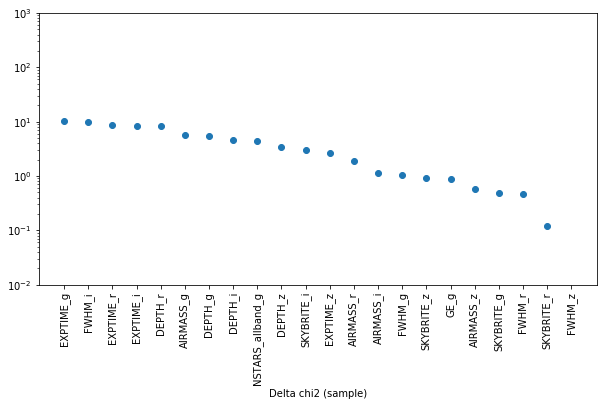

-------------------------
 iteration - 2
 nextweight EXPTIME_g
-------------------------
['vetoed', 'AIRMASS_z', 'FWHM_r']
vetoed
AIRMASS_z
FWHM_r
sys_iteration
----------------------------------
initialize function  EXPTIME_g
linear


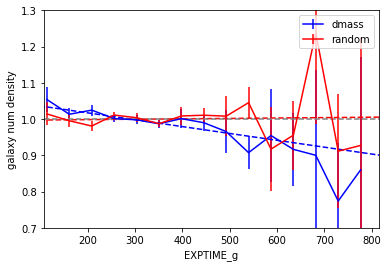

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  EXPTIME_g
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_exptime_g_SPT.fits
suffix =  wg_fwhm_r_airmass_z_exptime_g

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_exptime_g.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z_exptime_g.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_EXPTIME_g_SPT_wg_fwhm_r

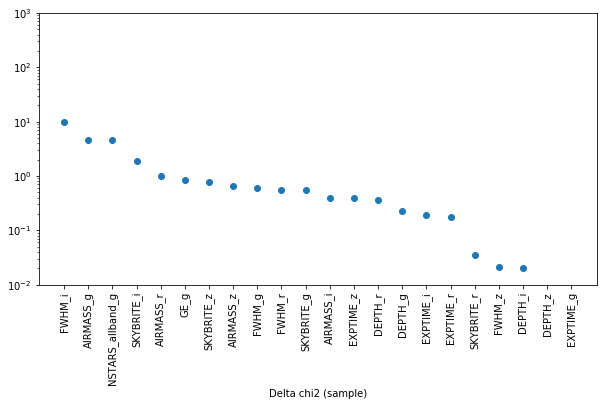

-------------------------
 iteration - 3
 nextweight FWHM_i
-------------------------
['vetoed', 'AIRMASS_z', 'EXPTIME_g', 'FWHM_r']
vetoed
AIRMASS_z
EXPTIME_g
FWHM_r
sys_iteration
----------------------------------
initialize function  FWHM_i
linear


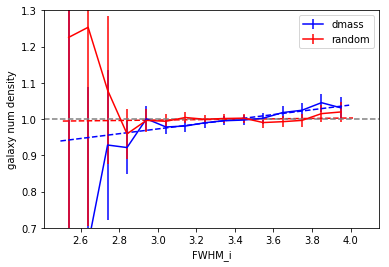

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  FWHM_i
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_fwhm_i_SPT.fits
suffix =  wg_fwhm_r_airmass_z_exptime_g_fwhm_i

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/syste

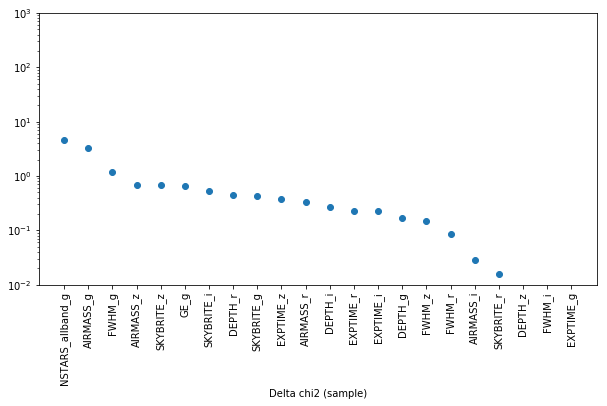

-------------------------
 iteration - 4
 nextweight NSTARS_allband_g
-------------------------
['FWHM_i', 'vetoed', 'AIRMASS_z', 'EXPTIME_g', 'FWHM_r']
FWHM_i
vetoed
AIRMASS_z
EXPTIME_g
FWHM_r
sys_iteration
----------------------------------
initialize function  NSTARS_allband_g
linear


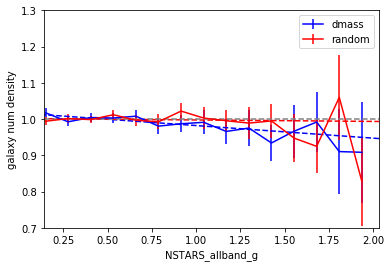

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  NSTARS_allband_g
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_nstars_allband_g_SPT.fits
suffix =  wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allba

chi2_null =  2.554412357857385
chi2_mod. =  1.8586800695928154
Delta chi2 (sample) = 0.6957322882645698
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_SKYBRITE_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g.txt.model

chi2_null =  17.213666347469086
chi2_mod. =  5.193724589616206
Delta chi2 (sample) = 12.01994175785288
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_SKYBRITE_i_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g.txt.model

chi2_null =  49.493578863607084
chi2_mod. =  40.69199136627884
Delta chi2 (sample) = 8.801587497328242
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_SKYBRITE_z_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g.txt.model

chi2_null =  3.754753854729173
chi2_mod. =  3.7535203521188825
Delta chi2 (sample) = 0.0012335026102903157
output save to  ../output/sfd_train_p

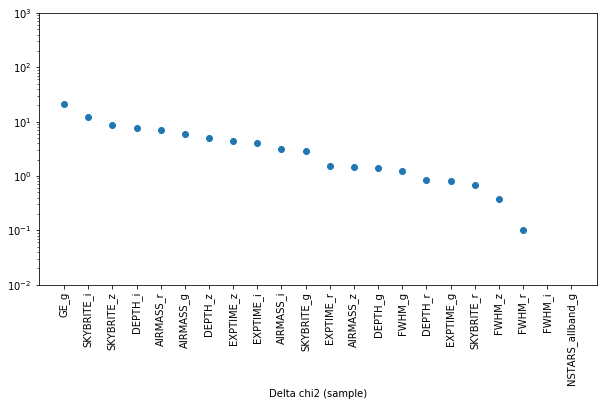

-------------------------
 iteration - 5
 nextweight GE_g
-------------------------
['vetoed', 'FWHM_i', 'EXPTIME_g', 'FWHM_r', 'AIRMASS_z', 'NSTARS_allband_g']
vetoed
FWHM_i
EXPTIME_g
FWHM_r
AIRMASS_z
NSTARS_allband_g
sys_iteration
----------------------------------
initialize function  GE_g
linear


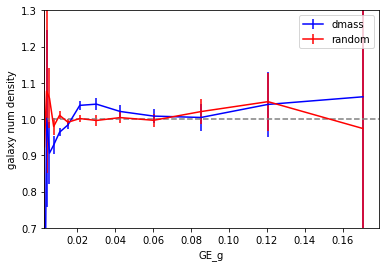

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  GE_g
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_ge_g_SPT.fits
suffix =  wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g

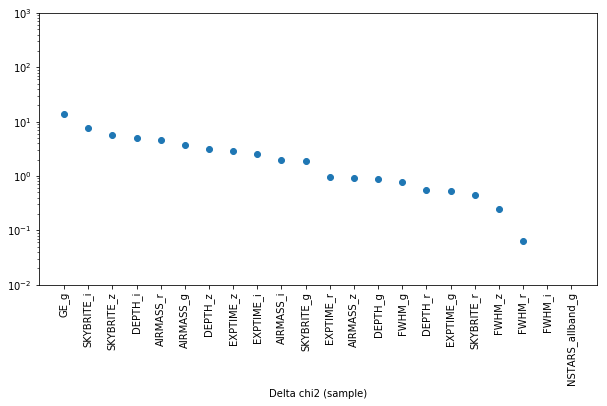

-------------------------
 iteration - 6
 nextweight SKYBRITE_i
-------------------------
['vetoed', 'FWHM_i', 'GE_g', 'EXPTIME_g', 'FWHM_r', 'AIRMASS_z', 'NSTARS_allband_g']
vetoed
FWHM_i
GE_g
EXPTIME_g
FWHM_r
AIRMASS_z
NSTARS_allband_g
sys_iteration
----------------------------------
initialize function  SKYBRITE_i
linear


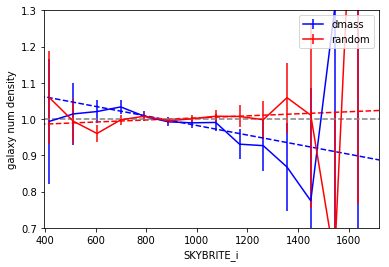

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  SKYBRITE_i
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_skybrite_i_SPT.fits
suffix =  wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_z_S

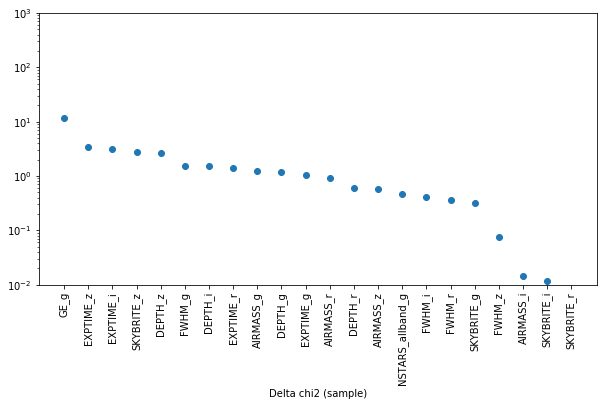

-------------------------
 iteration - 7
 nextweight EXPTIME_z
-------------------------
['vetoed', 'FWHM_i', 'GE_g', 'EXPTIME_g', 'FWHM_r', 'SKYBRITE_i', 'AIRMASS_z', 'NSTARS_allband_g']
vetoed
FWHM_i
GE_g
EXPTIME_g
FWHM_r
SKYBRITE_i
AIRMASS_z
NSTARS_allband_g
sys_iteration
----------------------------------
initialize function  EXPTIME_z
linear


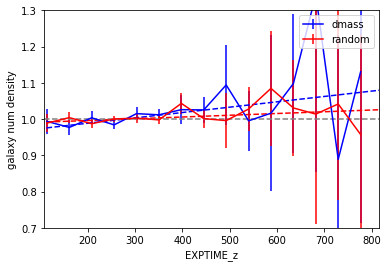

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  EXPTIME_z
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_exptime_z_SPT.fits
suffix =  wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol

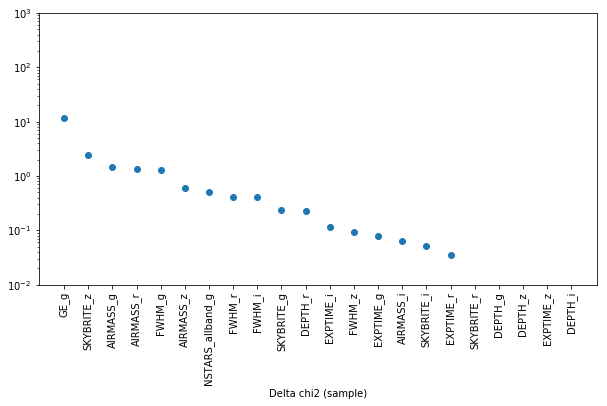

-------------------------
 iteration - 8
 nextweight SKYBRITE_z
-------------------------
['EXPTIME_z', 'vetoed', 'FWHM_i', 'GE_g', 'EXPTIME_g', 'FWHM_r', 'SKYBRITE_i', 'AIRMASS_z', 'NSTARS_allband_g']
EXPTIME_z
vetoed
FWHM_i
GE_g
EXPTIME_g
FWHM_r
SKYBRITE_i
AIRMASS_z
NSTARS_allband_g
sys_iteration
----------------------------------
initialize function  SKYBRITE_z
linear


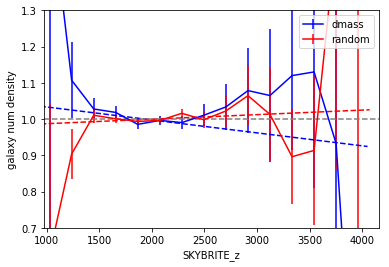

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  SKYBRITE_z
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_skybrite_z_SPT.fits
suffix =  wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z.txt
saving data to  ../output/s

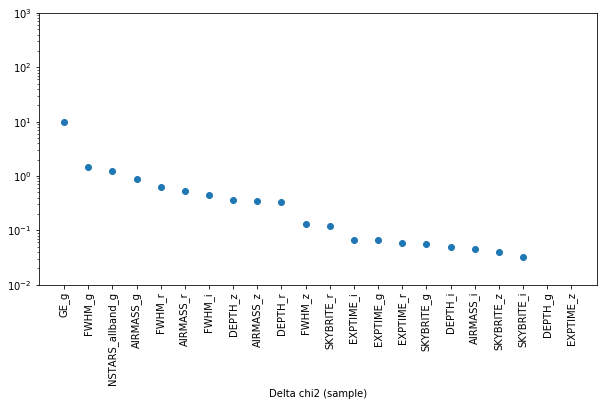

-------------------------
 iteration - 9
 nextweight FWHM_g
-------------------------
['EXPTIME_z', 'vetoed', 'SKYBRITE_z', 'FWHM_i', 'GE_g', 'EXPTIME_g', 'FWHM_r', 'SKYBRITE_i', 'AIRMASS_z', 'NSTARS_allband_g']
EXPTIME_z
vetoed
SKYBRITE_z
FWHM_i
GE_g
EXPTIME_g
FWHM_r
SKYBRITE_i
AIRMASS_z
NSTARS_allband_g
sys_iteration
----------------------------------
initialize function  FWHM_g
linear


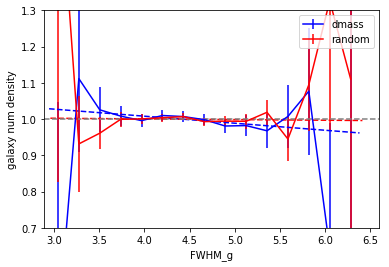

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  FWHM_g
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_fwhm_g_SPT.fits
suffix =  wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g.txt
saving 

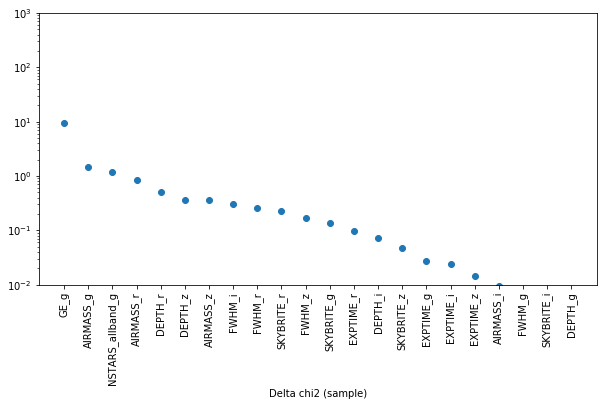

-------------------------
 iteration - 10
 nextweight AIRMASS_g
-------------------------
['EXPTIME_z', 'vetoed', 'FWHM_g', 'SKYBRITE_z', 'FWHM_i', 'GE_g', 'EXPTIME_g', 'FWHM_r', 'SKYBRITE_i', 'AIRMASS_z', 'NSTARS_allband_g']
EXPTIME_z
vetoed
FWHM_g
SKYBRITE_z
FWHM_i
GE_g
EXPTIME_g
FWHM_r
SKYBRITE_i
AIRMASS_z
NSTARS_allband_g
sys_iteration
----------------------------------
initialize function  AIRMASS_g
linear


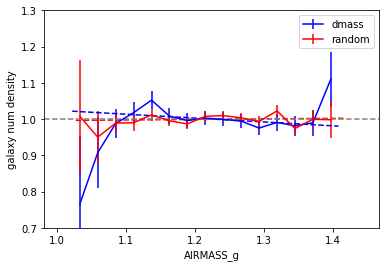

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  AIRMASS_g
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_airmass_g_SPT.fits
suffix =  wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exp

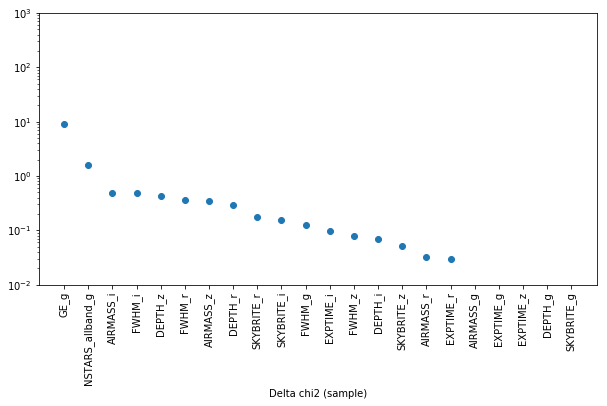

-------------------------
 iteration - 11
 nextweight AIRMASS_i
-------------------------
['EXPTIME_z', 'vetoed', 'FWHM_g', 'SKYBRITE_z', 'FWHM_i', 'GE_g', 'EXPTIME_g', 'FWHM_r', 'AIRMASS_g', 'SKYBRITE_i', 'AIRMASS_z', 'NSTARS_allband_g']
EXPTIME_z
vetoed
FWHM_g
SKYBRITE_z
FWHM_i
GE_g
EXPTIME_g
FWHM_r
AIRMASS_g
SKYBRITE_i
AIRMASS_z
NSTARS_allband_g
sys_iteration
----------------------------------
initialize function  AIRMASS_i
linear


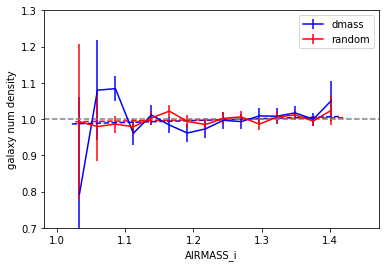

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  AIRMASS_i
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_airmass_i_SPT.fits
suffix =  wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars

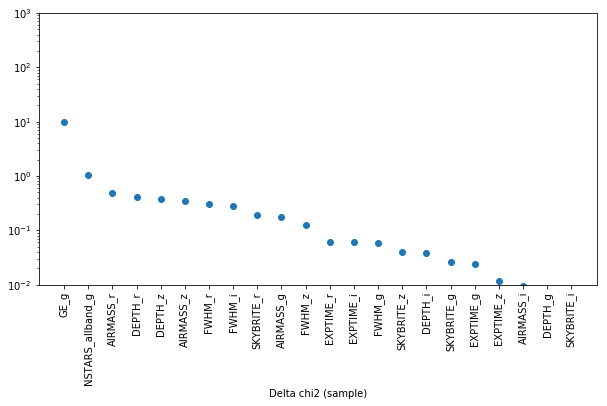

-------------------------
 iteration - 12
 nextweight AIRMASS_r
-------------------------
['EXPTIME_z', 'vetoed', 'FWHM_g', 'SKYBRITE_z', 'FWHM_i', 'GE_g', 'EXPTIME_g', 'FWHM_r', 'AIRMASS_g', 'AIRMASS_i', 'SKYBRITE_i', 'AIRMASS_z', 'NSTARS_allband_g']
EXPTIME_z
vetoed
FWHM_g
SKYBRITE_z
FWHM_i
GE_g
EXPTIME_g
FWHM_r
AIRMASS_g
AIRMASS_i
SKYBRITE_i
AIRMASS_z
NSTARS_allband_g
sys_iteration
----------------------------------
initialize function  AIRMASS_r
linear


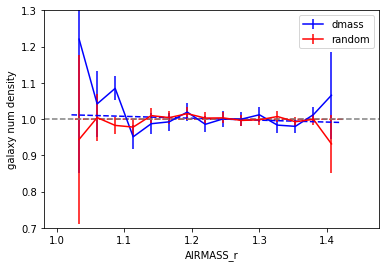

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  AIRMASS_r
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_airmass_r_SPT.fits
suffix =  wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_air

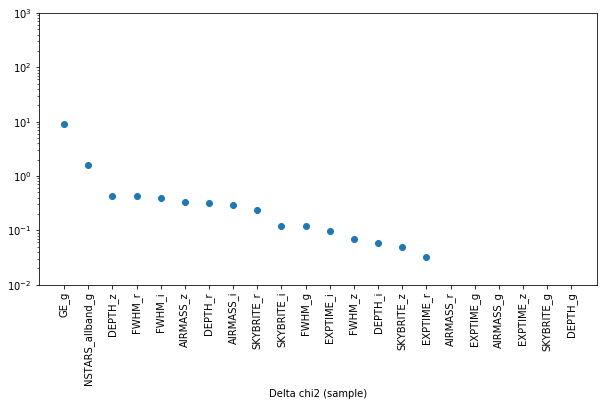

-------------------------
 iteration - 13
 nextweight DEPTH_z
-------------------------
['EXPTIME_z', 'vetoed', 'AIRMASS_r', 'FWHM_g', 'SKYBRITE_z', 'FWHM_i', 'GE_g', 'EXPTIME_g', 'FWHM_r', 'AIRMASS_g', 'AIRMASS_i', 'SKYBRITE_i', 'AIRMASS_z', 'NSTARS_allband_g']
EXPTIME_z
vetoed
AIRMASS_r
FWHM_g
SKYBRITE_z
FWHM_i
GE_g
EXPTIME_g
FWHM_r
AIRMASS_g
AIRMASS_i
SKYBRITE_i
AIRMASS_z
NSTARS_allband_g
sys_iteration
----------------------------------
initialize function  DEPTH_z
linear


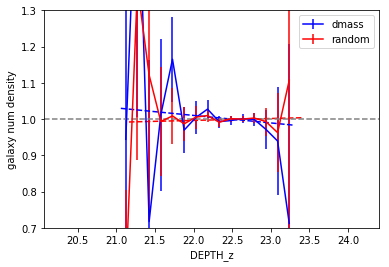

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  DEPTH_z
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_depth_z_SPT.fits
suffix =  wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r_depth_z

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r_depth_z.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r_depth_z.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH

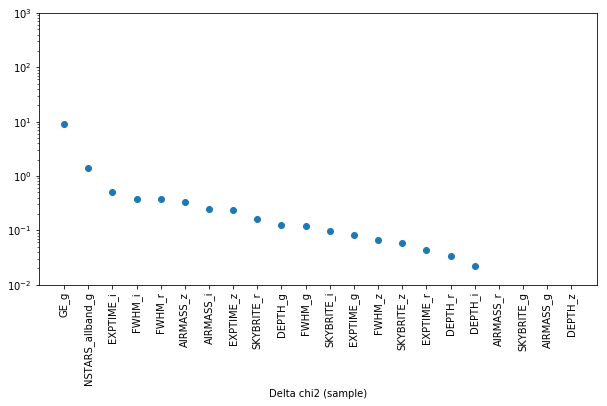

-------------------------
 iteration - 14
 nextweight EXPTIME_i
-------------------------
['EXPTIME_z', 'vetoed', 'AIRMASS_r', 'FWHM_g', 'SKYBRITE_z', 'FWHM_i', 'GE_g', 'EXPTIME_g', 'FWHM_r', 'DEPTH_z', 'AIRMASS_g', 'AIRMASS_i', 'SKYBRITE_i', 'AIRMASS_z', 'NSTARS_allband_g']
EXPTIME_z
vetoed
AIRMASS_r
FWHM_g
SKYBRITE_z
FWHM_i
GE_g
EXPTIME_g
FWHM_r
DEPTH_z
AIRMASS_g
AIRMASS_i
SKYBRITE_i
AIRMASS_z
NSTARS_allband_g
sys_iteration
----------------------------------
initialize function  EXPTIME_i
linear


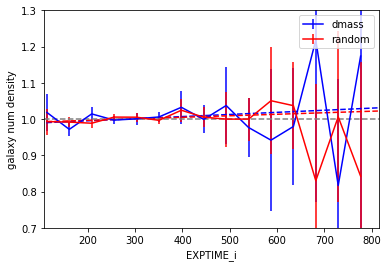

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  EXPTIME_i
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_exptime_i_SPT.fits
suffix =  wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r_depth_z_exptime_i

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r_depth_z_exptime_i.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r_depth_z_exptime_i.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol

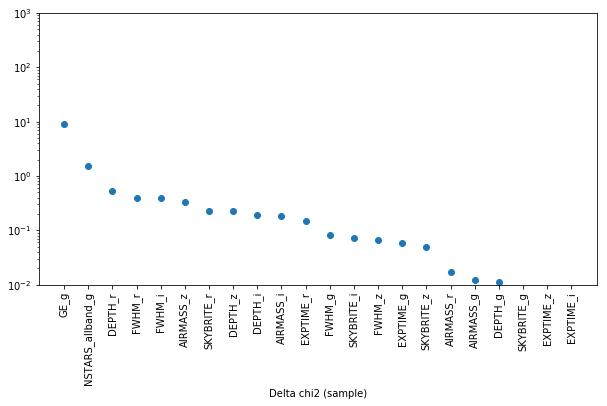

-------------------------
 iteration - 15
 nextweight DEPTH_r
-------------------------
['EXPTIME_z', 'vetoed', 'AIRMASS_r', 'FWHM_g', 'SKYBRITE_z', 'EXPTIME_i', 'FWHM_i', 'GE_g', 'EXPTIME_g', 'FWHM_r', 'DEPTH_z', 'AIRMASS_g', 'AIRMASS_i', 'SKYBRITE_i', 'AIRMASS_z', 'NSTARS_allband_g']
EXPTIME_z
vetoed
AIRMASS_r
FWHM_g
SKYBRITE_z
EXPTIME_i
FWHM_i
GE_g
EXPTIME_g
FWHM_r
DEPTH_z
AIRMASS_g
AIRMASS_i
SKYBRITE_i
AIRMASS_z
NSTARS_allband_g
sys_iteration
----------------------------------
initialize function  DEPTH_r
linear


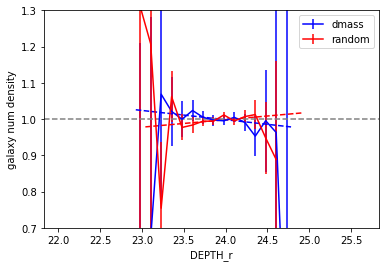

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  DEPTH_r
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_depth_r_SPT.fits
suffix =  wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r_depth_z_exptime_i_depth_r

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r_depth_z_exptime_i_depth_r.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r_depth_z_exptime_i_depth_r.txt
saving data to  ../output/sfd_train_photo_SamPle_nozb

chi2_null =  1.2297638274923806
chi2_mod. =  1.1925071017664535
Delta chi2 (sample) = 0.03725672572592709
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_SKYBRITE_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r_depth_z_exptime_i_depth_r.txt.model

chi2_null =  3.3054328819998338
chi2_mod. =  3.228163844454741
Delta chi2 (sample) = 0.07726903754509262
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_SKYBRITE_i_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r_depth_z_exptime_i_depth_r.txt.model

chi2_null =  27.630671725326398
chi2_mod. =  27.56847085635696
Delta chi2 (sample) = 0.06220086896943755
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_SKYBRITE_z_SPT_wg_

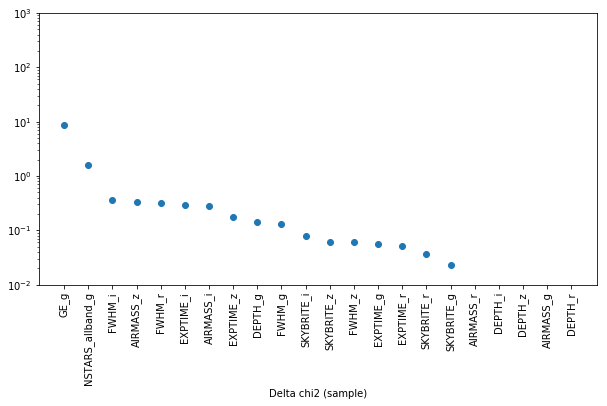

-------------------------
 iteration - 16
 nextweight FWHM_r
-------------------------
['EXPTIME_z', 'vetoed', 'AIRMASS_r', 'DEPTH_r', 'FWHM_g', 'SKYBRITE_z', 'EXPTIME_i', 'FWHM_i', 'GE_g', 'EXPTIME_g', 'FWHM_r', 'DEPTH_z', 'AIRMASS_g', 'AIRMASS_i', 'SKYBRITE_i', 'AIRMASS_z', 'NSTARS_allband_g']
EXPTIME_z
vetoed
AIRMASS_r
DEPTH_r
FWHM_g
SKYBRITE_z
EXPTIME_i
FWHM_i
GE_g
EXPTIME_g
FWHM_r
DEPTH_z
AIRMASS_g
AIRMASS_i
SKYBRITE_i
AIRMASS_z
NSTARS_allband_g
sys_iteration
----------------------------------
initialize function  FWHM_r
linear


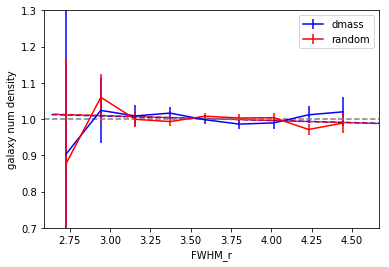

685616 665582
mask  0.9707795617371824
masked out  20034
store weight  FWHM_r
save weight to fits ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys//weights/wg_fwhm_r_SPT.fits
suffix =  wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r_depth_z_exptime_i_depth_r_fwhm_r

sys_ngal : 
the number of bins= 15
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r_depth_z_exptime_i_depth_r_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_nstars_allband_g_ge_g_skybrite_i_exptime_z_skybrite_z_fwhm_g_airmass_g_airmass_i_airmass_r_depth_z_exptime_i_depth_r_fwhm_r.txt
saving data to  ../output/sfd_trai

KeyboardInterrupt: 

In [92]:
applied_weight = []
for ii in range(21):
    
    #nextweight = 'AIRMASS_g'
    print '-------------------------'
    print ' iteration -', ii
    print ' nextweight', nextweight
    print '-------------------------'
    #if ii < 7 : pp = []
    #else : pp = properties
    pp = properties
    
    all_weight = weightmultiply(weightDic)
    function = 'linear'
    #if nextweight == 'SKYBRITE_i': function = 'errftn'
    
    print 'sys_iteration'
    sys_iteration( nextweight=nextweight, suffix=suffix, all_weight = all_weight, 
                      cat1=dmass, cat2=rand_masked, rand1 = rand2_masked, rand2=rand2_masked,
                      sysMap = sysMap, nside=4096, kind='SPT', function=function, function2 = None,
                      properties = pp, filters=['g', 'r', 'i', 'z'],
                      path=sysoutdir, plot=True, weightDic=weightDic, FullArea=SPTMaparea )
    
    if suffix == 'vetoed': suffix = 'wg_'+nextweight.lower()
    else : suffix = suffix+'_'+nextweight.lower()
        
    #print 'suffix', suffix, nextweight
    
    print 'fitting_allSP'
    print 'suffix ', suffix
    fitting_allSP( suffix, properties = properties, inputdir = sysoutdir, plot=False )
    nextwname, nextw = plotting_significance( property = properties, filter=['g', 'r', 'i','z'], kind = kind, 
                          suffix=suffix, 
                    path = sysoutdir, deltachi2=True)
    
    nextweight = nextwname[0]
    for i in range(1,len(nextwname)):
        if nextweight in applied_weight :
            nextweight = nextwname[i]
        else : break
    applied_weight.append(nextweight)



# Appling weights 

In [ ]:
#wg_fwhm_r_airmass_z_fwhm_i_exptime_g_airmass_g_fwhm_g_airmass_i_skybrite_i_depth_i_exptime_z_depth_z

In [113]:
suffix

'wg_fwhm_r_airmass_z_exptime_g_fwhm_i_airmass_g_fwhm_g'

In [32]:
suf = 'wg_fwhm_r_airmass_z_fwhm_i_exptime_g_airmass_g_fwhm_g_airmass_i_skybrite_i'
#suf = 'wg_fwhm_r_airmass_z_fwhm_i_exptime_g_airmass_g_fwhm_g_airmass_i_skybrite_i_depth_i_exptime_z_depth_z'

orderlabel = suf.split('_')[1:]
order = []
for i in np.arange(0, len(orderlabel), 2):
    order.append( orderlabel[i]+'_'+orderlabel[i+1] )
print order

weightDic_re = {}
weightDic_re['vetoed'] = dmass['EachProb_CMASS']
maskhp = maskingCatalogSP(catalog=dmass, maskonly=True, sysMap=sysMap)
weightDic_re['vetoed'][~maskhp] = 0 
for o in order : 
    w = fitsio.read(sysoutdir+'weights/wg_'+o+'_SPT.fits')
    weightDic_re[o] = w #[maskhp]
    
all_weight = weightmultiply(weightDic_re)

['fwhm_r', 'airmass_z', 'fwhm_i', 'exptime_g', 'airmass_g', 'fwhm_g', 'airmass_i', 'skybrite_i']


NameError: name 'sysMap' is not defined

In [28]:
weights = dmass['CMASS_PROB'] * dmass['VETO']

#15
sys_ngal(cat1 = dmass, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap_ge, 
         FullArea = SPTMaparea, properties = ['GE'], kind='SPT', nbins =7, 
         reweight= weights, nside = 4096,
         suffix='vetoed', outdir=sysoutdir)
#10
sys_ngal(cat1 = dmass, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap_nstar, 
         FullArea = SPTMaparea, properties = ['NSTARS_allband'], kind='SPT', nbins =7, 
         reweight= weights, nside = 4096,
         suffix='vetoed', outdir=sysoutdir)


sys_ngal : 
the number of bins= 7
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//sys/systematic_GE_g_SPT_vetoed.txt

sys_ngal : 
the number of bins= 7
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//sys/systematic_NSTARS_allband_g_SPT_vetoed.txt


In [29]:
#weights = all_weight

# 15
sys_ngal(cat1 = dmass, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap_ge, 
         FullArea = SPTMaparea, properties = ['GE'], kind='SPT', nbins =7, 
         reweight= all_weight, nside = 4096,
         suffix=suf, outdir=sysoutdir)
#10
sys_ngal(cat1 = dmass, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap_nstar, 
         FullArea = SPTMaparea, properties = ['NSTARS_allband'], kind='SPT', nbins =7, 
         reweight= all_weight, nside = 4096,
         suffix=suf, outdir=sysoutdir)


sys_ngal : 
the number of bins= 7
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//sys/systematic_GE_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_exptime_g_airmass_g_fwhm_g.txt

sys_ngal : 
the number of bins= 7
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//sys/systematic_NSTARS_allband_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_exptime_g_airmass_g_fwhm_g.txt


In [30]:
fitting_allSP( suf, properties = properties+['GE', 'NSTARS_allband'], inputdir = sysoutdir, plot=False )
fitting_allSP( 'vetoed', properties = properties+['GE', 'NSTARS_allband'], inputdir = sysoutdir, plot=False )

all linear function
chi2_null =  0.7510518961675887
chi2_mod. =  0.7116051531951879
Delta chi2 (sample) = 0.039446742972400806
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_exptime_g_airmass_g_fwhm_g.txt.model

chi2_null =  1.0046081709978196
chi2_mod. =  0.9813754876042025
Delta chi2 (sample) = 0.02323268339361717
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_exptime_g_airmass_g_fwhm_g.txt.model

chi2_null =  0.7494818555761062
chi2_mod. =  0.1706087002443945
Delta chi2 (sample) = 0.5788731553317117
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i_exptime_g_airmass_g_fwhm_g.txt.model

chi2_null =  2.861993666174057
chi2_mod. =  2.216499304872571
Delta chi2 (sample) = 0.6454943613014859
output save to  ../

output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//sys/systematic_FWHM_i_SPT_vetoed.txt.model

chi2_null =  4.409747771161924
chi2_mod. =  4.079055692036576
Delta chi2 (sample) = 0.33069207912534804
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//sys/systematic_FWHM_z_SPT_vetoed.txt.model

chi2_null =  1.9413397138821142
chi2_mod. =  1.3451959054965774
Delta chi2 (sample) = 0.5961438083855368
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//sys/systematic_SKYBRITE_g_SPT_vetoed.txt.model

chi2_null =  6.451304238458584
chi2_mod. =  4.736607037856295
Delta chi2 (sample) = 1.7146972006022887
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//sys/systematic_SKYBRITE_r_SPT_vetoed.txt.model

chi2_null =  4.548970119253474
chi2_mod. =  3.036493410166212
Delta chi2 (sample) = 1.5124767090872622
output save to  ../output/sfd_train_photo_SamPle_

----------------------------------
initialize function  DEPTH_g
linear


KeyError: 'sys_DEPTH_g_SPT'

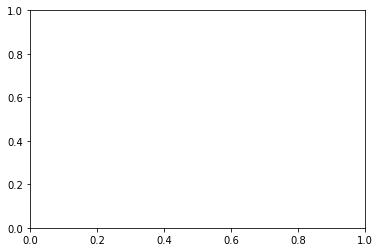

In [74]:

"""
sys_iteration( nextweight=nextweight, suffix=suffix, all_weight = all_weight, 
                  cat1=dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2=rand2_masked,
                  sysMap = sysMap_nstar, nside=4096, kind='SPT', function=function, function2 = None,
                  properties = properties, filters=['g', 'r', 'i', 'z'],
                  path=sysoutdir, plot=True, weightDic=weightDic, FullArea=SPTMaparea )

if suffix == 'vetoed': suffix = 'wg_'+nextweight.lower()
else : suffix = suffix+'_'+nextweight.lower()

fitting_allSP( suffix, properties = properties[:-2], inputdir = sysoutdir, plot=False )
nextwname, nextw = plotting_significance( property = properties, filter=['g', 'r', 'i','z'], kind = kind, 
                      suffix=suffix, 
                path = sysoutdir, deltachi2=True)
                
"""

In [31]:
filters = ['g', 'r', 'i', 'z']

[45.23377177211485, 43.193963500807925, 22.817461872715803, 10.62431334090567, 5.97938848251715, 4.140790976738564, 4.033291708661969, 3.7446073139226357, 3.6624121572329367, 2.33637543818307, 1.97413062600512, 1.7146972006022887, 1.5124767090872622, 0.6073311281624036, 0.5981909467997006, 0.5961438083855368, 0.5715812882271423, 0.3440945212787536, 0.33069207912534804, 0.18001490515841478, 0.017705651034948033]


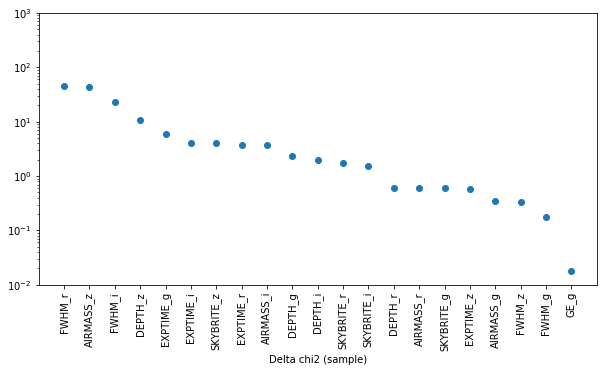

[1.2599449922630042, 0.910365027107094, 0.7876139678920708, 0.6454943613014859, 0.5788731553317117, 0.5481118197879693, 0.3009745800932928, 0.273665004850395, 0.18565682391973704, 0.12551948972023297, 0.10321009343012899, 0.10286131268833554, 0.10144314451766023, 0.08726728562425468, 0.08669906428507601, 0.039446742972400806, 0.02323268339361717, 0.019144183019346173, 0.008376484458267885, 0.007500064685137531, 0.0010600340761630633]


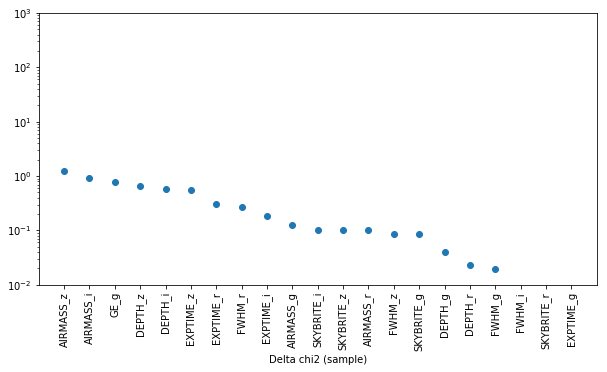

In [32]:
label_no_weight, values_no_weight = plotting_significance( property = properties+['GE'], filter=filters, kind = kind, suffix='vetoed', 
                    path = sysoutdir, deltachi2=True)
label_full_weight, values_full_weight = plotting_significance( property = properties+['GE'], filter=filters, kind = kind, suffix=suf, 
                    path = sysoutdir, deltachi2=True)
#label_full_weight2, values_full_weight2 = plotting_significance( property = properties, filter=filters, kind = kind, suffix=suf2, 
#                    path = inputdir, deltachi2=True)

0

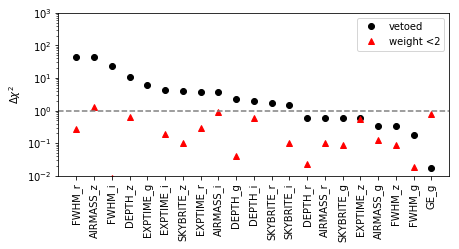

In [85]:

values_full_weight_reorder = []
for la in label_no_weight:
    for j in range(len(label_full_weight)):
        if la == label_full_weight[j]: 
            values_full_weight_reorder.append(values_full_weight[j])
            break
"""
values_full_weight_reorder2 = []
for la in label_no_weight:
    for j in range(len(label_full_weight2)):
        if la == label_full_weight2[j]: 
            values_full_weight_reorder2.append(values_full_weight2[j])
            break
"""           
values_full_weight_reorder = np.array(values_full_weight_reorder)
#values_full_weight_reorder2 = np.array(values_full_weight_reorder2)

fig, ax = plt.subplots(figsize = (7,3))

ax.plot( np.arange( len(values_no_weight) ), values_no_weight,  'ko' , label='vetoed'  )
ax.plot( np.arange( len(values_no_weight) ), values_full_weight_reorder, 'r^', label='weight <2'  )
#ax.plot( np.arange( len(values_no_weight) ), values_full_weight_reorder2, 'b^', label='weight <1'  )


#ax.plot( values_no_weight, np.arange( len(values_no_weight) ),  'ko'  )
#ax.plot( values_full_weight_reorder, np.arange( len(values_no_weight) ),  'ro'  )
#ax.axhline(y = 1, ls = '--', color='grey')
ax.axhline(y = 1, ls = '--', color='grey')
#ax.axhline(y = 1, ls = '--', color='grey')
ax.set_ylim(0.01,1000)
ax.set_ylabel(r'$\Delta \chi^2$')
ax.set_xticks( np.arange(len(values_no_weight)))
ax.set_xticklabels(label_no_weight, rotation = 90)
ax.set_yscale('log')
ax.legend(loc='best')

#fig.savefig(inputdir+'comparison3_chisquare_'+suf+'.png')
0

In [86]:
suf

'wg_fwhm_r_airmass_z_fwhm_i_exptime_g_airmass_g_fwhm_g'

stellar density (+ fwhm_r)
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar/figure/comparison_systematic_NSTARS_allband_g.pdf
stellar density (+ airmass_z)
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar/figure/comparison_systematic_NSTARS_allband_g.pdf
stellar density (+ exptime_g)
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar/figure/comparison_systematic_NSTARS_allband_g.pdf
stellar density (+ fwhm_i)
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar/figure/comparison_systematic_NSTARS_allband_g.pdf


0

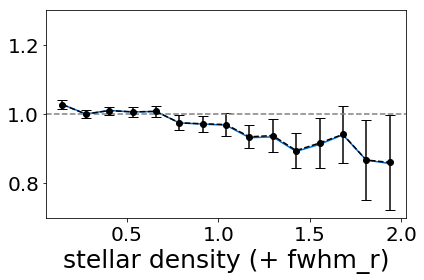

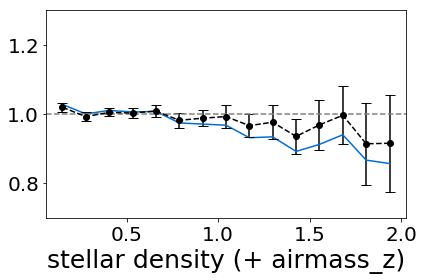

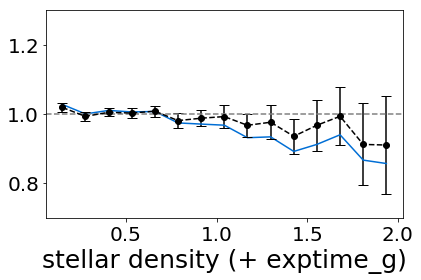

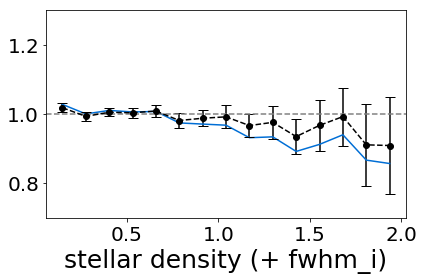

In [103]:

picdir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//stellar/figure/'
from run_systematics import plot_sysweight_one

suf='wg_fwhm_r'
plot_sysweight_one(property = 'NSTARS_allband', xlabel = 'stellar density (+ fwhm_r)' , ylabel=r'', 
                   nside = 1024, kind = 'SPT', 
                   suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=picdir)

suf='wg_fwhm_r_airmass_z'
plot_sysweight_one(property = 'NSTARS_allband', xlabel = 'stellar density (+ airmass_z)' , ylabel=r'', 
                   nside = 1024, kind = 'SPT', 
                   suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=picdir)

suf='wg_fwhm_r_airmass_z_exptime_g'
plot_sysweight_one(property = 'NSTARS_allband', xlabel = 'stellar density (+ exptime_g)' , ylabel=r'', 
                   nside = 1024, kind = 'SPT', 
                   suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=picdir)

suf='wg_fwhm_r_airmass_z_exptime_g_fwhm_i'
plot_sysweight_one(property = 'NSTARS_allband', xlabel = 'stellar density (+ fwhm_i)' , ylabel=r'', 
                   nside = 1024, kind = 'SPT', 
                   suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=picdir)

In [ ]:

picdir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/'
from run_systematics import plot_sysweight_one

suf='wg_fwhm_r'
plot_sysweight_one(property = 'NSTARS_allband', xlabel = 'stellar density (+ fwhm_r)' , ylabel=r'', 
                   nside = 1024, kind = 'SPT', 
                   suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=picdir)

suf='wg_fwhm_r_airmass_z'
plot_sysweight_one(property = 'NSTARS_allband', xlabel = 'stellar density (+ airmass_z)' , ylabel=r'', 
                   nside = 1024, kind = 'SPT', 
                   suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=picdir)

suf='wg_fwhm_r_airmass_z_exptime_g'
plot_sysweight_one(property = 'NSTARS_allband', xlabel = 'stellar density (+ exptime_g)' , ylabel=r'', 
                   nside = 1024, kind = 'SPT', 
                   suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=picdir)

suf='wg_fwhm_r_airmass_z_exptime_g_fwhm_i'
plot_sysweight_one(property = 'NSTARS_allband', xlabel = 'stellar density (+ fwhm_i)' , ylabel=r'', 
                   nside = 1024, kind = 'SPT', 
                   suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=picdir)

stellar density
saving fig to  ../paper_figure/halfNbin/comparison_systematic_NSTARS_allband_g.pdf
None
saving fig to  ../paper_figure/halfNbin/comparison_systematic_GE_g.pdf
None
saving fig to  ../paper_figure/halfNbin/comparison_systematic_FWHM_r.pdf
None
saving fig to  ../paper_figure/halfNbin/comparison_systematic_AIRMASS_z.pdf
None
saving fig to  ../paper_figure/halfNbin/comparison_systematic_EXPTIME_g.pdf
None
saving fig to  ../paper_figure/halfNbin/comparison_systematic_FWHM_i.pdf
None
saving fig to  ../paper_figure/halfNbin/comparison_systematic_AIRMASS_g.pdf
None
saving fig to  ../paper_figure/halfNbin/comparison_systematic_FWHM_g.pdf


0

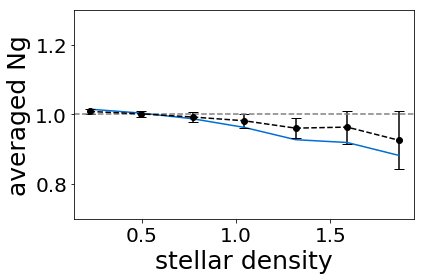

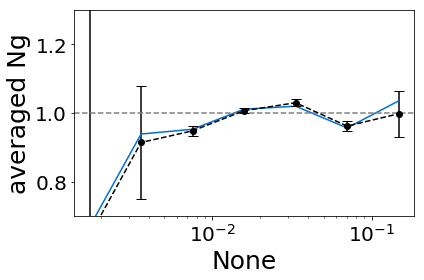

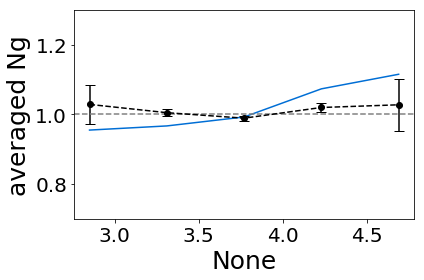

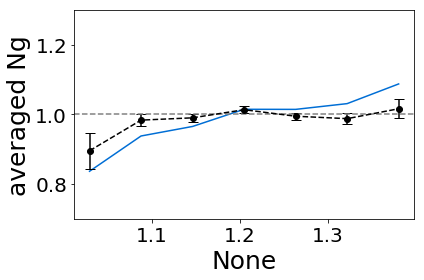

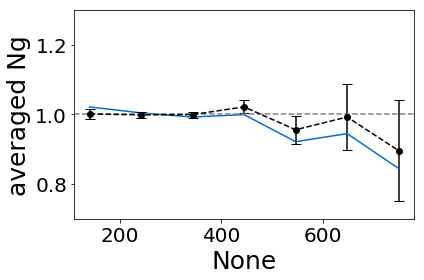

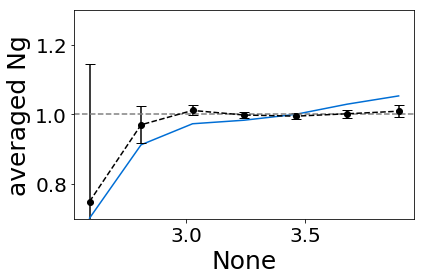

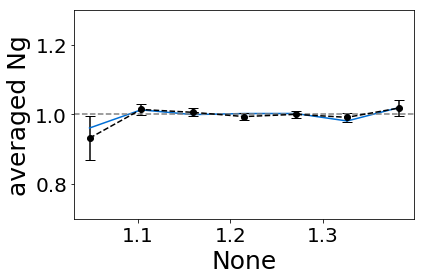

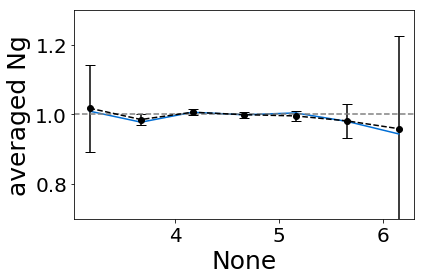

In [89]:
from run_systematics import plot_sysweight_one
plot_sysweight_one(property = 'NSTARS_allband', xlabel = 'stellar density' , ylabel=r'', 
                   nside = 1024, kind = 'SPT', 
                   suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'GE', nside = 1024, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'FWHM', filter='r', nside = 1024, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'AIRMASS', filter='z', nside = 1024, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'EXPTIME', filter='g', nside = 1024, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'FWHM', filter='i', nside = 1024, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'AIRMASS', filter='g', nside = 1024, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'FWHM', filter='g', nside = 1024, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

In [37]:
figoutdir

'../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//figure/'

saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//figure/comparison_systematic_DEPTH_SPT_wg_fwhm_r_airmass_z_fwhm_i_exptime_g_airmass_g_fwhm_g.pdf
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//figure/comparison_systematic_EXPTIME_SPT_wg_fwhm_r_airmass_z_fwhm_i_exptime_g_airmass_g_fwhm_g.pdf
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//figure/comparison_systematic_AIRMASS_SPT_wg_fwhm_r_airmass_z_fwhm_i_exptime_g_airmass_g_fwhm_g.pdf
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//figure/comparison_systematic_SKYBRITE_SPT_wg_fwhm_r_airmass_z_fwhm_i_exptime_g_airmass_g_fwhm_g.pdf
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//figure/comparison_systematic_FWHM_SPT_wg_fwhm_r_airmass_z_fwhm_i_exptime_g_airmass_g_fwhm_g.pdf
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e

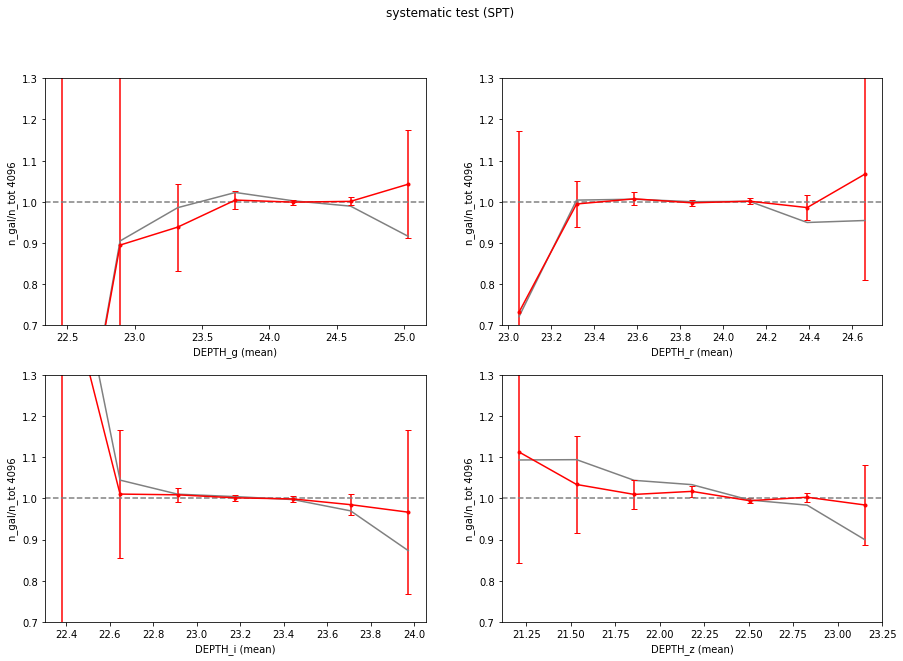

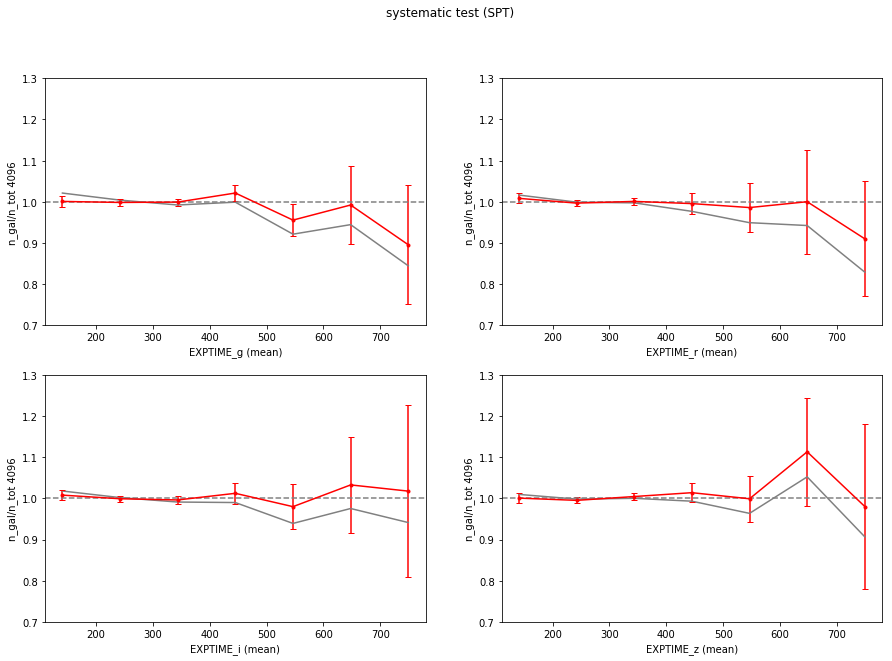

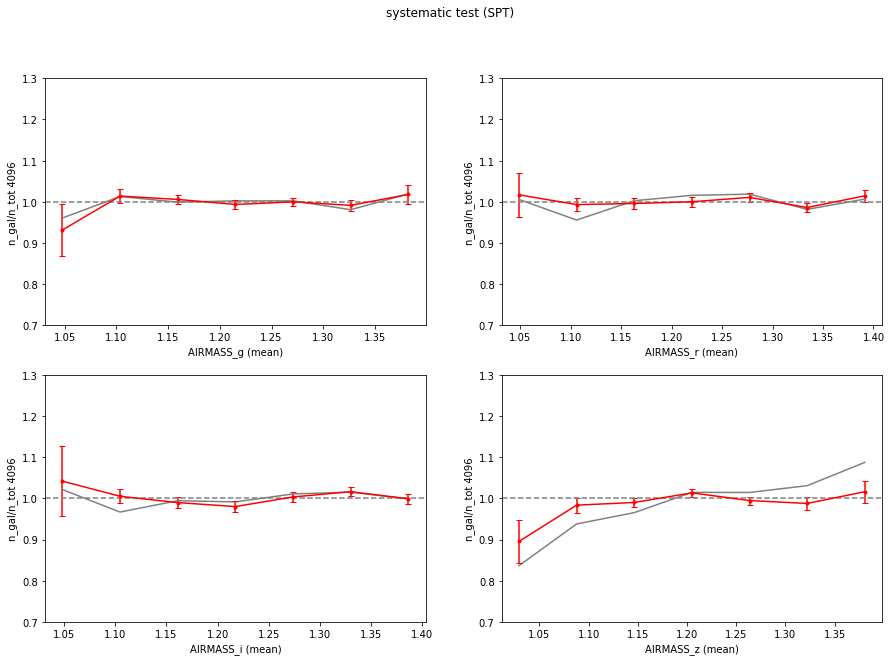

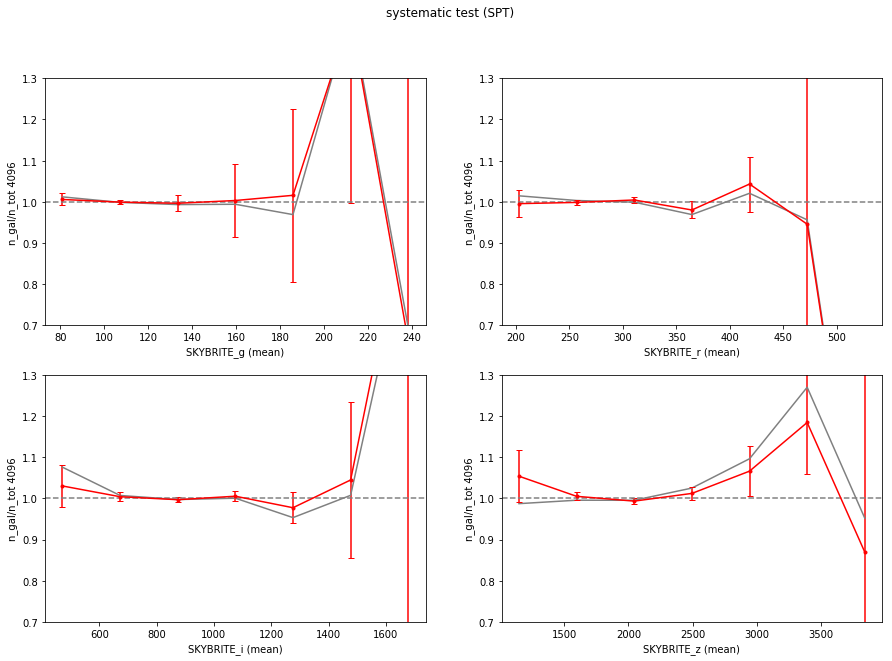

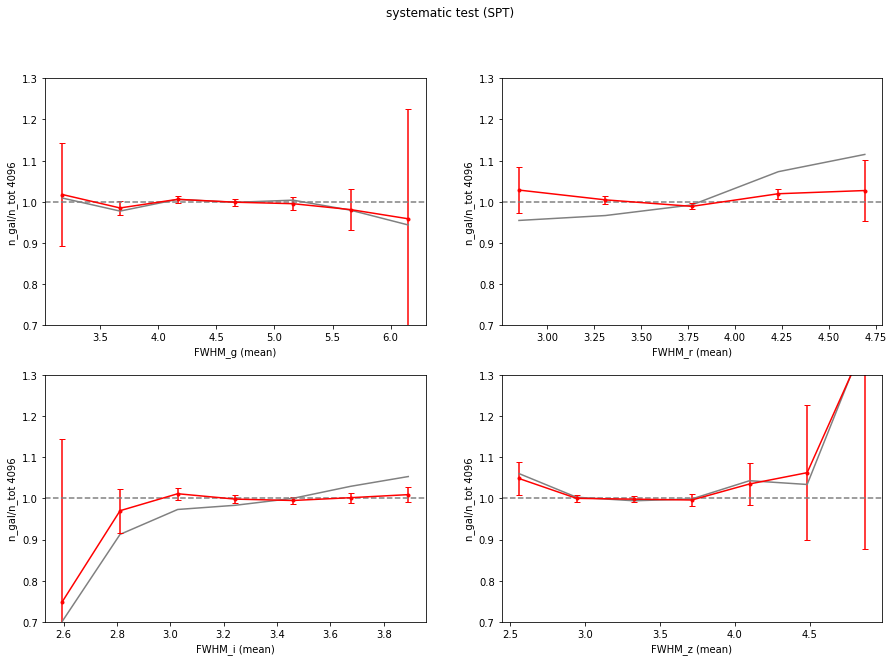

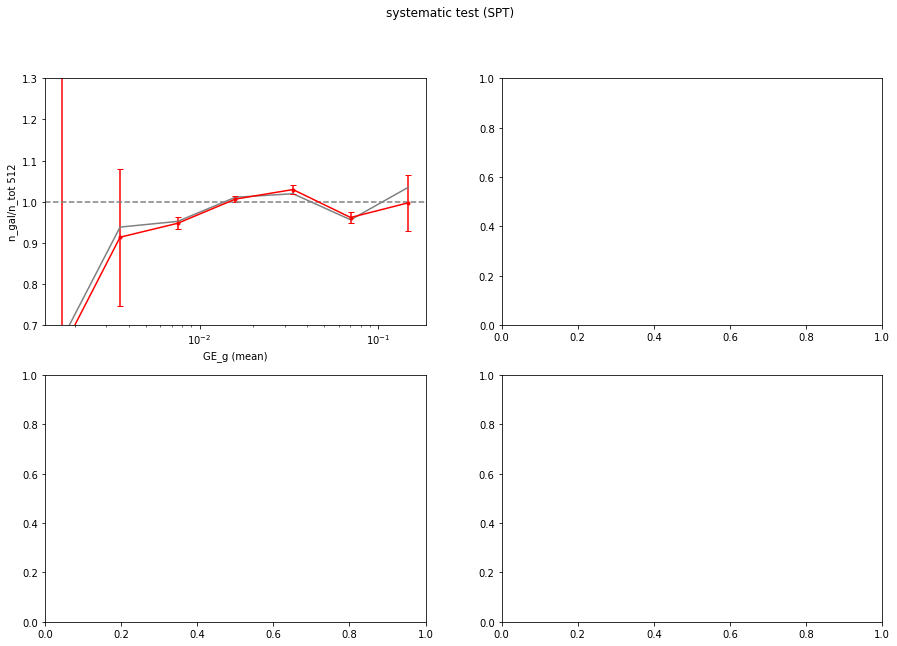

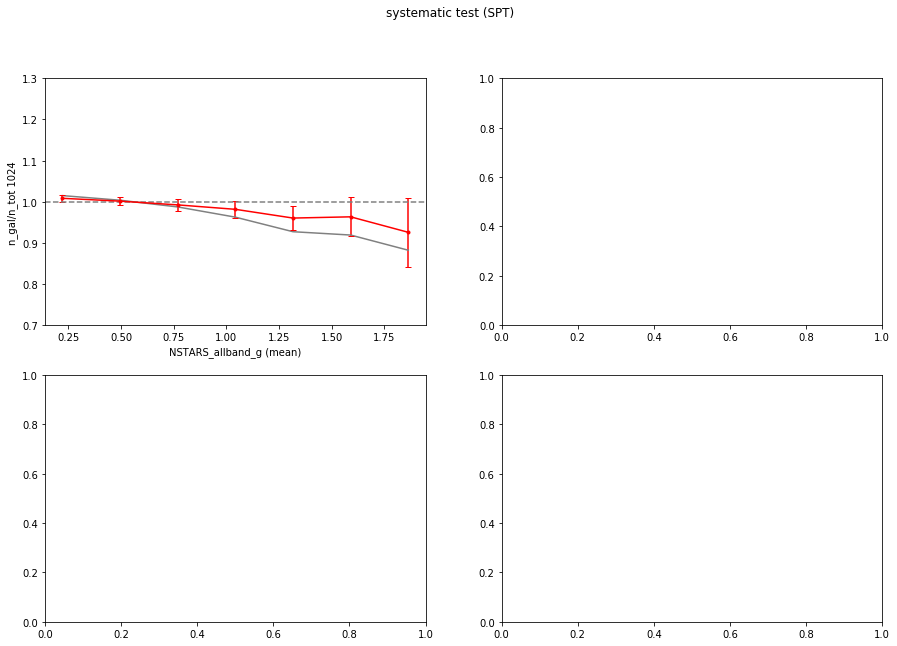

In [38]:
from run_systematics import plot_sysweight
for pr in properties + ['GE', 'NSTARS_allband']:
    plot_sysweight(property = pr, nside = 4096, kind = 'SPT', 
               suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=figoutdir)



In [99]:
weightslist = [fitsio.read(wdir+'wg_'+o+'_SPT.fits') for o in order]
#all_weight = np.ones(weightslist[0].size)

In [41]:
maskedGoldMask_spt = maskingCatalogSP(catalog=GoldMask_spt, sysMap=sysMap)

6153627 6030163
mask  0.9799363854845281


In [42]:
dmass_masked = maskingCatalogSP(catalog=dmass, sysMap=sysMap)

6777228 6641688
mask  0.9800006728414626


In [60]:
rand_no_mask = io.SearchAndCallFits(path = rootdir, keyword='random_x50_dmass_spt.fits')


--------------------------------
 calling catalog
--------------------------------
random_x50_dmass_spt.fits


In [ ]:
#tree corr
from systematics_module.corr import angular_correlation
from systematics_module.corr import angular_correlation_poisson

pcut1 = (dmass['EachProb_CMASS'] > 0.01)
pcut2 = (dmass_masked['EachProb_CMASS'] > 0.01)

"""
dmass['WEIGHT'] = dmass['CMASS_PROB']
angular_correlation(data = dmass[pcut1], rand = rand_no_mask, 
                    nbins=10, weight = [True, None], njack = 100, 
                    suffix = '_dmass_no_weight_pcut01_nbins10_jk100', dir = basedir)

dmass['WEIGHT'] = dmass['CMASS_PROB'] * dmass['VETO']
angular_correlation(data = dmass[pcut1], rand = rand2, nbins=10, 
                    weight = [True, None], njack = 100, 
                    suffix = '_dmass_vetoed_pcut01_nbins10_jk100', dir = basedir)

"""
"""

dmass['WEIGHT'] = dmass['CMASS_PROB']
angular_correlation_poisson(data = dmass[pcut1], rand = rand_no_mask, 
            nbins=10, weight_data = True, 
            suffix = '_dmass_no_weight_pcut01_nbins10_jk100', dir = basedir)


dmass['WEIGHT'] = dmass['CMASS_PROB'] * dmass['VETO']
angular_correlation_poisson(data = dmass[pcut1], rand = rand2, 
            nbins=10, weight_data = True, 
            suffix = '_dmass_vetoed_pcut01_nbins10_jk100', dir = basedir)

"""

weight_com = dmass['CMASS_PROB']
#dmass['WEIGHT'] = weight_com

print 'initial', np.sum(dmass['WEIGHT'][pcut1]), np.sum(dmass['EachProb_CMASS'][pcut1])
for i in range(1,len(weightslist)+1):
    
     
    #for w in weightslist[:i]: weight_com *= w
    print i, order[i-1]
    weight_com *= weightslist[i-1]
    dmass['WEIGHT'] = weight_com
    #dmass_m = maskingCatalogSP(catalog=dmass, sysMap=sysMap)
    #rand_masked = maskingCatalogSP(catalog=rand2, sysMap=sysMap)
    
    
    #randind = np.random.choice( rand2.size, size = rand2.size/10)
    #rand_masked = rand2[randind]
    #dmass_m = dmass[randind]
    #pcut = (dmass_m['EachProb_CMASS'] > 0.01)
    
    if i > 0 :       
        
        angular_correlation(data = dmass[pcut1], rand = rand2, nbins=10, weight = [True, None], njack = 100, 
                            suffix = '_dmass_weight'+str(i-1)+'_pcut01_nbins10_jk100', dir = basedir)
        #angular_correlation_poisson(data = dmass[pcut1], rand = rand2, 
        #                nbins=10, weight_data = True, 
        #                suffix = '_dmass_weight'+str(i-1)+'_pcut01_nbins10_jk100', dir = basedir)
    else : pass
    

initial 117292.90214602613 117292.90214602613
1 fwhm_r
calculate angular correlation function
X (1656, 2)  centers (100, 2)  tol=1e-05  maxiter=200
20 iterations  cluster sizes: [14 27 17 21 12 19  8 22 20 12 13  9 11 15  8  6 14 20 17 18 18 14 13 10
 14 14 17 15 15 22 20  6 23 28 13 26 11 15 13 14 18 22  8 18  9  8 19  5
 22 14 16 16 12 10 11 12 23 14 10  8 29 36  8 19  9 25 27  9 22 20 20 16
 12 24 21 19 14 16 25 17 14 24 17 13 20 20 16 17 15 26 21 23 15 24 13 17
  9 22 14 29]
X (685616, 2)  centers (100, 2)  tol=1e-05  maxiter=200
106 iterations  cluster sizes: [7814 8231 7799 7503 4742 7853 6046 7850 4968 4244 5320 8343 6710 5471
 6742 4769 6551 6898 8227 8871 5703 7248 5125 7063 6672 7426 6562 7411
 7087 8179 8376 2899 7305 7279 4957 7755 7713 5166 5848 6657 7803 9616
 7044 7454 5497 7760 4928 6166 8161 6193 7281 8312 7340 6517 6721 7298
 7877 3260 6465 7805 8789 8429 7532 6451 5974 7384 7341 7595 6273 7196
 5067 6917 3382 8348 6940 8455 5496 7003 7897 5409 8316 7728 7257 5650
 65

Text(0,0.5,'$\\omega(\\theta)$')

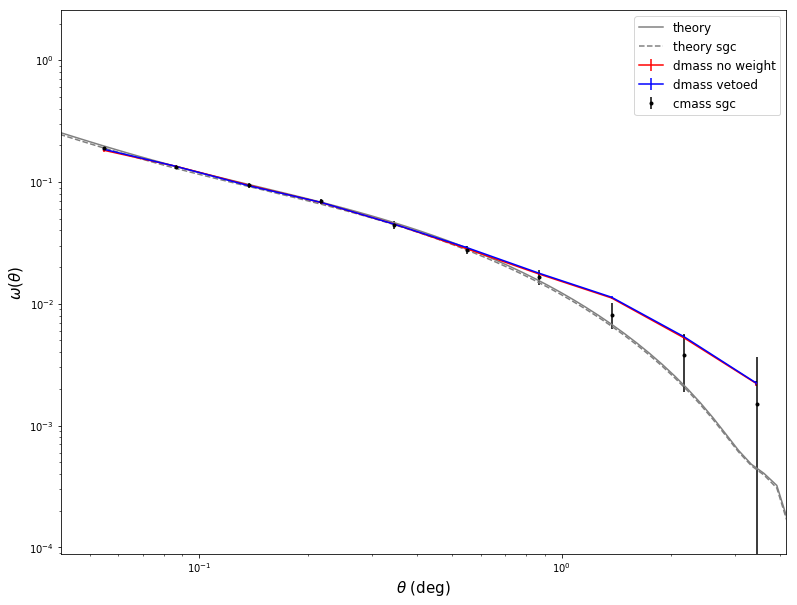

In [62]:
import scipy

theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)

#_, theory_bias = np.loadtxt('../data_txt/acf_cmass_sgc_theory_bias.txt', unpack=True)
#meanr, xi, xi_err = np.loadtxt(rootdir+'/act//acf_auto_gold_st82_nbins10_jk100.txt', unpack=True)
meanr, xi, xi_err = np.loadtxt(rootdir+'/act//acf_auto_poisson_dmass_no_weight_pcut01_nbins10_jk100.txt', unpack=True)
meanr2, xi2, xi_err2 = np.loadtxt(rootdir+'/act//acf_auto_poisson_dmass_vetoed_pcut01_nbins10_jk100.txt', unpack=True)
#meanr3, xi3, xi_err3 = np.loadtxt(rootdir+'/act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.txt', unpack=True)

theory_interp = scipy.interpolate.interp1d(theta_th, theory)
theory_interp = theory_interp(meanr)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
theory_sgc_interp = theory_sgc_interp(meanr)

nzs_ratio = theory_sgc_interp/theory_interp


meanr_sgc, xi_sgc, xi_err_sgc = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt',unpack=True)
cov_cmass_s = np.genfromtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')




fig, ax = plt.subplots(figsize = (13, 10))


ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='r', label='dmass no weight')
ax.errorbar(meanr2, xi2, yerr = xi_err2, fmt = '-', color='b', label='dmass vetoed')
#ax.errorbar(meanr3, xi3, yerr = xi_err3, fmt = '-', color='g', label='dmass all weight')
ax.errorbar(meanr_sgc, xi_sgc, yerr = xi_err_sgc, fmt = 'k.', color='r', label='cmass sgc')

ax.plot(theta_th, theory, '-', color='grey', label='theory')
ax.plot(theta_th, theory_sgc, '--', color='grey', label='theory sgc')
#ax.plot(theta_th, theta_th*theory_bias, '--', color='green', label='theory bias')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2 $ = {:0.3f}  (south)'.format(chisqr), fontsize = 12)
#ax.set_ylim(1e-4,1)
ax.set_xlim(2.5/60, 250./60)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega(\theta)$', fontsize = 15)
0

In [16]:
def chisquare_calculation(xi1, xi2, F):
    
    diff = (xi1 - xi2)
    chi2 = np.dot(np.dot(diff, F), diff.T)
    
    return chi2

../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//act/acf_auto_poisson_dmass_no_weight_pcut01_nbins10_jk100.txt
err db, db / br1, brmin, br2 : 0.02812350576586664 0.011620280984676157 0.9917039353249879 1.005844095508292 1.0198274410908545
../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//act/acf_auto_poisson_dmass_vetoed_pcut01_nbins10_jk100.txt
err db, db / br1, brmin, br2 : 0.028075874056603056 0.006568815952606943 0.9891590808042089 1.0032952308588199 1.017234954860812
../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//act/acf_auto_poisson_dmass_weight0_pcut01_nbins10_jk100.txt
err db, db / br1, brmin, br2 : 0.027984277331866036 0.0017181275584334799 0.9867698530805397 1.0008598024043196 1.0147541304124057
../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//act/acf_auto_poisson_dmass_weight1_pcut01_nbins10_jk100.txt
err db, db / br1, brmin, br2 : 0.02803431379478638 0.006648041403586991 0.989239970

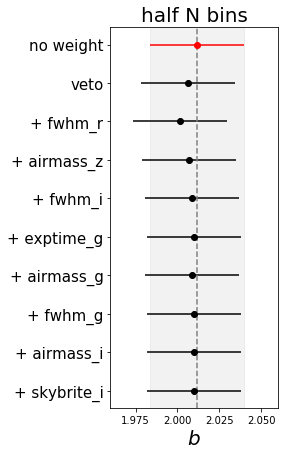

In [33]:
from systematics import brel_chisqr_fitting
import scipy


theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
#theory_sgc_interp = theory_sgc_interp(meanr)

fig, ax = plt.subplots(figsize = (3,7))
brelsqr = np.linspace(0.5, 1.5, 5000) 
b_n = 2.0
brelarr = np.sqrt(brelsqr)
dbarray = b_n*(1-brelarr)



meanr_sgc, xi_sgc, xi_err_sgc = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt',unpack=True)
cov_cmass_s = np.genfromtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')


labels_SP = ['no weight', 'veto'] + ['+ '+o for o in order]#[1:] ]

filenames = [ basedir+ 'acf_auto_poisson_dmass_no_weight_pcut01_nbins10_jk100.txt', \
              basedir + 'acf_auto_poisson_dmass_vetoed_pcut01_nbins10_jk100.txt'
            ] \
+[ basedir+'acf_auto_poisson_dmass_weight'+str(j)+'_pcut01_nbins10_jk100.txt' for j in range(0, len(labels_SP)-2)]

covnames = [ basedir+ 'acf_auto_dmass_no_weight_pcut01_nbins10_jk100.cov', \
              basedir + 'acf_auto_dmass_vetoed_pcut01_nbins10_jk100.cov'
           ] \
+[ basedir+'acf_auto_dmass_weight'+str(j)+'_pcut01_nbins10_jk100.cov' for j in range(0, len(labels_SP)-2)]


chisquare_list = []
for j in range(1, len(labels_SP)+1):
#for j in [1,7]:
    
    print filenames[j-1]
    meanrw, xiw, xi_errw = np.loadtxt( filenames[j-1], unpack=True)
    #cov_dmass_w = np.loadtxt( covnames[j-1], unpack=True)
    cov_dmass_w = np.loadtxt( covnames[1], unpack=True)
    #meanrw, xiw, xi_errw = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.txt', unpack=True)
    #cov_dmass_w = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.cov', unpack=True)
    HFd = HF(100, 10)
    F_d = HFd * np.linalg.inv(cov_dmass_w)
    #F_s = np.linalg.inv(cov_cmass_s)
    err_brelw, brelw, chisqr_resultw = brel_chisqr_fitting(xiw, theory_sgc_interp(meanrw), F_d, verbose=True)
    #err_brelw, brelw, chisqr_resultw = brel_chisqr_fitting(xiw, xi_sgc, F_s, verbose=True)
    
    #chi2 = chisquare_calculation(xiw, xi_sgc, F_s)
    chi2 = chisquare_calculation(xiw, theory_sgc_interp(meanrw), F_d)
    chisquare_list.append( chi2/xiw.size )
    
    if j == 1 : 
        color = 'red'
        ax.axvspan(2*brelw - err_brelw*2., 2*brelw + err_brelw*2.,  alpha=0.1, color='grey')
        ax.axvline(x=2*brelw, color = 'grey', ls='--')
        #ax.axvspan(- err_brelw*2.,  err_brelw*2.,  alpha=0.1, color='grey')
        #ax.axvline(x=0, color = 'grey', ls='--')
    else : color = 'k'  
        
    ax.errorbar(2*brelw, len(labels_SP)+1-j, xerr =err_brelw*2., fmt='-o', color=color)
    
#ax.set_xlabel(r'$\Delta b = b_{fid} - b_x$', fontsize = 20)
ax.set_xlabel(r'$b$', fontsize = 20)
#ax.set_ylabel(r'$\chi^2$')
ax.legend(loc=1)
ax.set_xlim(1.96, 2.06)
#ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_yticks(np.arange(1, len(labels_SP)+1 ))

labels = labels_SP[::-1]
ax.set_yticklabels( labels, fontsize = 15) 
#fig.savefig(figoutdir + 'sys_bias_weight.png')
#print 'pic save to ', figoutdir + 'sys_bias_weight.png'



ax.set_title('half N bins', fontsize = 20)



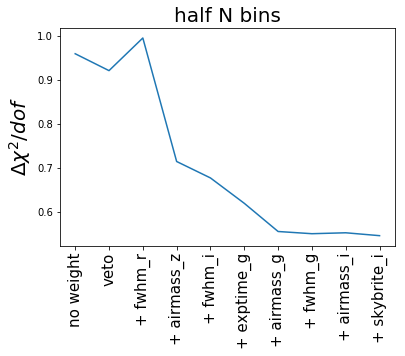

In [36]:
fig, ax = plt.subplots()

ax.plot( np.arange(10), chisquare_list )

#ax.set_xlabel(r'$\Delta b = b_{fid} - b_x$', fontsize = 20)
ax.set_ylabel(r'$\Delta \chi^2/ dof$', fontsize = 20)
#ax.set_ylabel(r'$\chi^2$')
#ax.legend(loc=1)
#ax.set_xlim(1.96, 2.06)
#ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticks(np.arange(0, len(labels_SP) ))

labels = labels_SP
ax.set_xticklabels( labels, fontsize = 15, rotation=90) 
ax.set_title('half N bins', fontsize = 20)